# **Generador Aleatorio de Diagramas de Circuitos Resistivos** 
#### By: Cristian Alape, Alvaro Zarabanda, Youssef Ortiz 

## *Primera actividad*

Conociendo los conceptos de las leyes de Kirchhoff y el concepto de malla. A través de un código que lo genere, obtener el diagrama de un circuito aleatorio de una malla, que solo tiene cuatro elementos:

$X = \left[ 2,3,4,5 \right]$ 

$P = \left[ \frac{1}{4},\frac{1}{4},\frac{1}{4},\frac{1}{4} \right]$

$H = va(x, p, 2, 1)$

$V = va(x, p, 2, 1)$

Determinar matemáticamente el valor de la probabilidad de que el circuito generado cumpla con las leyes de Kirchhoff, si se considera que los parámetros de los elementos son distintos. Luego, validen dicho resultado por medio de una simulación.

Para determinar estas probabilidades inicialmente, según la naturaleza de las leyes de Kirchhoff se evalúan dos criterios de invalidez para diagramas de circuitos resistivos de una malla 

### **Criterio 1**: cuando hay más de una fuente de corriente en el circuito de una malla 

cuando se tiene una fuente de corriente en un circuito de una sola malla (es decir, conectada en serie), la fuente de corriente debe tener el mismo valor y dirección de corriente para que el circuito sea físicamente consistente, todos los componentes están conectados en serie. Esto significa que la misma corriente fluye a través de cada componente del circuito.

Si se intentara imponer una segunda fuente de corriente, por ejemplo, una de 2 amperios, y otra fuente en serie de 3 amperios en la misma dirección, esto es físicamente imposible. La corriente en un circuito en serie debe ser la misma en todos los puntos.

### **Criterio 2**: cuando hay solo voltajes (4) y cortos (2) 

En un circuito de una malla no todos sus elementos pueden ser cortocircuitos porque esto eliminaría la función del circuito, además, La Ley de Voltajes de Kirchhoff (LVK) establece que la suma algebraica de todas las diferencias de potencial alrededor de cualquier lazo cerrado debe ser igual a cero. Si se tiene una fuente de voltaje (V) en la malla y todos los demás elementos son cortocircuitos (con una caída de voltaje idealmente cero), la ecuación de la LVK sería:

$V - 0 - 0 - ... - 0 = 0 $

$V = 0$

Esto implica que la fuente de voltaje debe ser cero, lo cual contradice la existencia de una fuente de voltaje activa. 

### Procedimiento para generar los circuitos aleatorios  

Inicialmente se define la función va(x,p,m,n) la cual recibe los siguientes parámetros:
- **x**: el conjunto de datos de la matriz según los números asignados a los diferentes elementos del circuito resistivo 
- **p**:  distribuciones de probabilidad sobre el conjunto de valores el x. cada elemento de p representa la probabilidad de que cada elemento de x sea seleccionado en el circuito.
- **m**: filas de la matriz de entrada
- **n**:  columnas de la matriz de entrada  

El objetivo de esta función es realizar un muestreo aleatorio con los elementos de x. Esto significa que cada vez que se selecciona un elemento para la matriz, se hace de forma independiente según las probabilidades definidas en p.  

La probabilidad de seleccionar un valor específico de x es siempre la misma, independientemente de las selecciones anteriores. Por lo tanto, esta función implementa un proceso para generar realizaciones de matrices aleatorias basadas en una distribución de probabilidad discreta dada. 

Una vez definida la función va, que genera las matrices de forma aleatoria, se definen 100000 experimentos aleatorios en la simulación donde se generan las matrices del circuito generado en cada iteración. 

### Experimento aleatorio

Este consiste en realizar cuatro extracciones independientes de la lista de elementos del circuito $(x = [2, 3, 4, 5])$, donde cada número corresponde a un elemento y tiene una probabilidad de $(p = 0.25)$ de ser seleccionado. Estas cuatro extracciones se obtienen combinando los elementos de dos matrices $(H)$ y $(V)$, cada una de dimensión $(1 \times 2)$, generadas por la función va. 

### Espacio muestral

El espacio muestral $(\Omega)$ de este experimento consiste en todas las posibles combinaciones de elementos del circuito definidos como: $({2, 3, 4, 5})$. El tamaño del espacio muestral es $(|\Omega| = 4^4 = 256)$, ya que cada una de las cuatro posiciones puede tomar uno de los cuatro valores posibles. Se asume que cada una de estas 256 secuencias es equiprobable, con una probabilidad de $((0.25)^4 = \frac{1}{256})$. 

### Probabilidades en criterio 1  

- SI aparecen dos fuentes de corriente hay $(\binom{4}{2} = 6)$ formas de elegir las dos posiciones donde aparece. Las otras dos posiciones pueden tomar cualquiera de los otros 3 elementos $(({2, 3, 4}))$. Por lo tanto, hay $(6 \times 3^2 = 54)$ secuencias donde la fuente de corriente aparece exactamente dos veces.
- Si aparecen tres fuentes de corriente hay $(\binom{4}{3} = 4)$ formas de elegir las tres posiciones donde aparece. La otra posición puede tomar cualquiera de los otros 3 valores. Por lo tanto, hay $(4 \times 3^1 = 12)$ secuencias donde la fuente de corriente aparece exactamente tres veces.
- Si aparecen cuatro fuentes de corriente hay $(\binom{4}{4} = 1)$ forma de que aparezca en las cuatro posiciones (la secuencia es $[5, 5, 5, 5]$)

El número total de secuencias que cumplen la Condición 1 es $(54 + 12 + 1 = 67)$. La probabilidad teórica de la Condición 1 es, por lo tanto, $(\frac{67}{256})$. 

### Probabilidades criterio 2  

Cuando todos los elementos son cortocircuitos o fuentes de voltaje, si consideramos que estos elementos hay $(2^4 = 16)$ secuencias de este tipo de elementos. Por lo tanto, hay $(16 - 1 = 15)$ secuencias que cumplen la Condición 2, por lo tanto, $(\frac{15}{256})$. 

### Probabilidad Teórica Total 

Se define teorico_total = teorico_1 + teorico_2. Esto es demustra porque las dos condiciones son mutuamente excluyentes. Si la Condición 1 se cumple (la fuente de corriente aparece al menos dos veces), entonces la Condición 2 no puede cumplirse (ya que la Condición 2 requiere que todos los elementos sean cortocircuitos o fuentes de voltaje). 

Por lo tanto, la probabilidad teórica de que se cumpla la Condición 1 o la Condición 2 es: $[P(\text{Condición 1 o Condición 2}) = P(\text{Condición 1}) + P(\text{Condición 2}) = \frac{67}{256} + \frac{15}{256} = \frac{82}{256} = \frac{41}{128}]$ 

### Resultados Experimentales 

La simulación corre el experimento aleatorio 100,000 veces. Las variables almacenan las frecuencias relativas con las que se cumplen la Condición 1 y la Condición 2, respectivamente. Según la Ley de los Grandes Números, a medida que el número de experimentos aumenta, estas frecuencias relativas deberían aproximarse a las probabilidades teóricas correspondientes. 
- fr_1 debería ser aproximadamente igual a teorico_1 $((\frac{67}{256} \approx 0.2617))$.
- fr_2 debería ser aproximadamente igual a teorico_2 $((\frac{15}{256} \approx 0.0586))$.
- fr_total debería ser aproximadamente igual a teorico_total $((\frac{82}{256} \approx 0.3203))$. 

### Diagramas de flujo previo al código

#### Función generadora de elementos aleatorios 

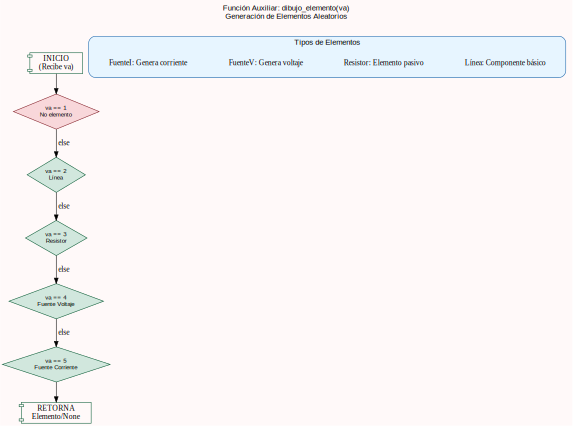

In [30]:
genera_aleatorio()

#### Función constructora del circuito con elementos aleatorios  

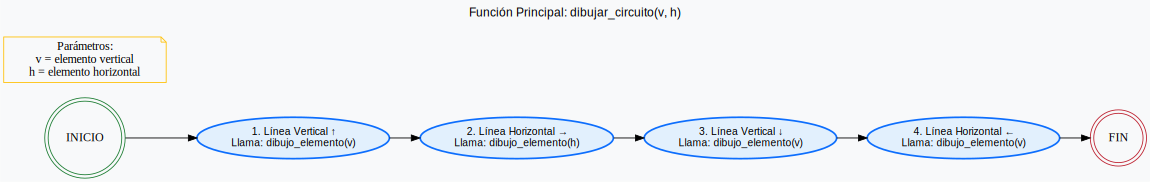

In [32]:
constructor_circuito()

#### Función simulación 

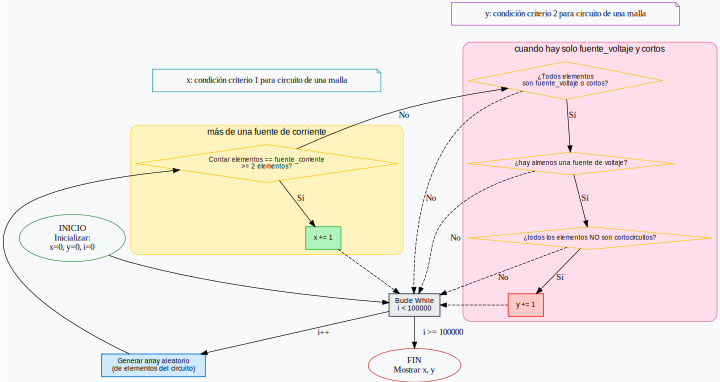

In [34]:
simulacion()

## *Segunda actividad*

Conociendo los conceptos de las leyes de Kirchhoff y el concepto de malla. A través de un código que lo genere, obtener el diagrama de un circuito aleatorio de dos mallas, que solo tiene cuatro elementos:

$X = \left[ 2,3,4,5 \right]$ 

$P = \left[ \frac{1}{4},\frac{1}{4},\frac{1}{4},\frac{1}{4} \right]$

$H = va(x, p, 2, 1)$

$V = va(x, p, 2, 1)$

Determinar matemáticamente el valor de la probabilidad de que el circuito generado cumpla con las leyes de Kirchhoff, si se considera que los parámetros de los elementos son distintos. Luego, validen dicho resultado por medio de una simulación.

Para determinar estas probabilidades inicialmente, según la naturaleza de las leyes de Kirchhoff se evalúan dos criterios de invalidez para diagramas de circuitos resistivos de dos mallas 

### **Criterio 1**: cuando hay solo voltajes (4) y cortos (2) en cada malla y la exterior

En un circuito de una malla no todos sus elementos pueden ser cortocircuitos porque esto eliminaría la función del circuito, además, La Ley de Voltajes de Kirchhoff (LVK) establece que la suma algebraica de todas las diferencias de potencial alrededor de cualquier lazo cerrado debe ser igual a cero. Si se tiene una fuente de voltaje (V) en la malla y todos los demás elementos son cortocircuitos (con una caída de voltaje idealmente cero), la ecuación de la LVK sería:

$V - 0 - 0 - ... - 0 = 0 $

$V = 0$

Esto implica que la fuente de voltaje debe ser cero, lo cual contradice la existencia de una fuente de voltaje activa. Al aplicarse esto a cualquier lazo cerrado, el criterio aplica tanto para cada malla por separado como para los 6 elementos que rodean las mallas sin el elemento del medio

### **Criterio 2.1**: cuando hay más de una fuente de corriente en una malla

Cuando se tiene una fuente de corriente en un circuito de una sola malla (es decir, conectada en serie), la fuente de corriente debe tener el mismo valor y dirección de corriente para que el circuito sea físicamente consistente, todos los componentes están conectados en serie. Esto significa que la misma corriente fluye a través de cada componente del circuito.

Si se intentara imponer una segunda fuente de corriente, por ejemplo, una de 2 amperios, y otra fuente en serie de 3 amperios en la misma dirección, esto es físicamente imposible. La corriente en un circuito en serie debe ser la misma en todos los puntos.

### **Criterio 2.2**: cuando hay una fuente de corriente en el medio y al menos una en cada malla

Una fuente de corriente impone un flujo fijo de corriente y cuando se tiene una fuente en el nodo compartido de dos mallas, esta afecta a ambas por lo que, tener una fuente adicional en estas lleva a que el circuito sea imposible a menos que las fuentes sean perfectamente compatibles, algo que no se presenta en un modelo aleatorio.

### Experimento aleatorio

Este consiste en realizar cuatro extracciones independientes de la lista de elementos del circuito $(x = [2, 3, 4, 5])$, donde cada número corresponde a un elemento y tiene una probabilidad de $(p = 0.25)$ de ser seleccionado. Estas cuatro extracciones se obtienen combinando los elementos de dos matrices $(H)$ y $(V)$, cada una de dimensión $(1 \times 2)$, generadas por la función va. 

### Espacio muestral

El espacio muestral $(\Omega)$ de este experimento consiste en todas las posibles combinaciones de elementos del circuito definidos como: $({2, 3, 4, 5})$. El tamaño del espacio muestral es $(|\Omega| = 4^7 = 16384)$, ya que cada una de las siete posiciones puede tomar uno de los cuatro valores posibles. Se asume que cada una de estas 16384 secuencias es equiprobable, con una probabilidad de $((0.25)^7 = \frac{1}{16384})$. 

### Probabilidad de la intersección criterio 2

- $(\binom{3}{1} \times 3 + 1 = 10)$ formas de elegir la posicion en la que aparece. Las , por lo que hay $(10 \times 4 = 400)$ combinaciones donde la fuente de corriente aparece más de una vez en una malla y en el medio.

El número total de secuencias que cumplen ambas condiciones al tiempo es $(\binom{3}{1} \times 3^2)^2 \times 1 = 729$. La probabilidad teórica es, por lo tanto, $(\frac{729}{16384})$. 

El número total de secuencias que cumplen la Condición 1 es $2560 + 2560 + 729 - 400 = 5449$. La probabilidad teórica de la Condición 1 es, por lo tanto, $(\frac{5449}{16384})$.

### Probabilidades criterio 1

- Cuando todos los elementos son cortocircuitos o fuentes de voltaje, si consideramos que estos elementos hay $(2^4 = 16)$ secuencias de este tipo de elementos en cada malla y $4^3 = 64$ para las otras 3 posiciones cada una con 4 posibles elementos. Por lo tanto, hay $(16 \times 64 = 1024)$ secuencias que cumplen la condición 2, por lo tanto, $(\frac{1024}{16384})$.
- El mismo análisis aplica para la otra malla.
- Para la malla exterior (6 posiciones rodeando el circuito sin el elemento del medio) se tienen $2^6 = 64$ combinaciones de cortos y fuentes de voltaje en la malla exterior, y $4$ formas de elegir elementos para el medio.

### Probabilidad de la intersección criterio 1

- Para la intersección entre las dos mallas, se tienen $(2^4 \times 2^3 = 128)$ formas de elegir cortos y fuentes de voltaje en una malla, y se multiplican con la cantidad de combinaciones con respecto a la otra malla (3 posiciones restantes).
- Para la intersección de una malla (4 posiciones) con la exterior (6 posiciones), se tienen $2^6$ combinaciones correspondientes a la exterior y 2 opciones para la posición del medio $(2^1), esto da como resultado $2^6 \times 2 = 128$
- La intersección de los 3 casos (cada malla y la exterior) tiene $2^3 \times 2^3 \times 2^1 = 128$ combinaciones.

El número total de secuencias que cumplen la Condición 2 es $1024 + 1024 + 256 - 128 - 128 - 128 + 128 = 2048$. La probabilidad teórica de la Condición 1 es, por lo tanto, $(\frac{2048}{16384})$.

A este cálculo hay que restarle los casos en los que solamente hay cortos y se cumple la LVK:

- Cuando el circuito tiene solo cortos, el elemento en la posición del medio puede ser cualquiera entre cortos, resistencias o fuentes de corriente $(3)$.
- Cuando el circuito tiene cortos en una malla y 3 posiciones en la otra, hay $(\binom{7}{1} \times 2^3 = 56)$

El número total de secuencias que cumplen la Condición 2 termina siendo $1024 + 1024 + 256 - 128 - 128 - 128 + 128 - 115 = 1933$. La probabilidad teórica de la Condición 1 es, por lo tanto, $(\frac{1933}{16384})$.

### Probabilidades en criterio 2.1

Para las probabilidades del criterio de corrientes cada malla cuenta con 3 posiciones (sin el nodo compartido)

- SI aparecen dos fuentes de corriente hay $(\binom{3}{2} = 3)$ formas de elegir las dos posiciones donde aparece. La otra posición pueden tomar cualquiera de los otros 3 elementos $(({2, 3, 4}))$. Por lo tanto, hay $(3 \times 3^1 = 9)$ secuencias donde la fuente de corriente aparece exactamente dos veces.
- Si aparecen tres fuentes de corriente hay solo 1 forma de elegir las tres posiciones donde aparece. Por lo tanto, hay 1 secuencia donde la fuente de corriente aparece exactamente tres veces.
- El número de combinaciones de las 4 posiciones restantes es $4^4$, ya que pueden ser cualquiera de los 4 elementos

El número total de secuencias que cumplen la Condición 1.1 es $((9 + 1) * 4^4= 2560)$. La probabilidad teórica de la Condición 1 es, por lo tanto, $(\frac{2560}{16384})$. 

### Probabilidades en criterio 2.2

- Si aparece una fuente de corriente en una malla, hay $(\binom{3}{1} = 3)$ formas de elegir la posicion en la que aparece. Las otras dos posiciones pueden tener cualquiera de los 3 elementos restantes, por lo que hay $(3 \times 3^2 = 27)$ combinaciones donde la fuente de corriente aparece una vez en la malla.
- El mismo análisis aplica para la otra malla.
- Sólo hay 1 forma de elegir la posición del medio para la fuente de corriente.

El número total de secuencias que cumplen la Condición 1.2 es $(\binom{3}{1} \times 3^2)^2 \times 1 = 729$. La probabilidad teórica de la Condición 1 es, por lo tanto, $(\frac{729}{16384})$. 

### Probabilidad Teórica Total 

Se define teorico_total = teorico_1 + teorico_2 - intersección. Esto porque las dos condiciones no son mutuamente excluyentes. Si la Condición 1 se cumple (la fuente de corriente aparece al menos dos veces en una malla), aún la condición 2 puede cumplirse también. 

Por lo tanto, la probabilidad teórica de que se cumpla la Condición 1 o la Condición 2 es: $[P(\text{Condición 1 o Condición 2}) = P(\text{Condición 1}) + P(\text{Condición 2}) - P(\text{Intersección}) = \frac{5449}{16384} + \frac{1933}{16384} - \frac{300}{16384} = \frac{7082}{16384} = \frac{3541}{8192}] \approx 0.43225097656$ 

### Resultados Experimentales 

La simulación corre el experimento aleatorio 300,000 veces. Las variables almacenan las frecuencias relativas con las que se cumplen la Condición 1 y la Condición 2, respectivamente. Según la Ley de los Grandes Números, a medida que el número de experimentos aumenta, estas frecuencias relativas deberían aproximarse a las probabilidades teóricas correspondientes. 
- fr_1 debería ser aproximadamente igual a teorico_voltaje $((\frac{1933}{16384} \approx 0.11798))$.
- fr_2 debería ser aproximadamente igual a teorico_corriente $((\frac{5449}{16384} \approx 0.33258))$.
- fr_inv debería ser aproximadamente igual a teorico_total $((\frac{3541}{8192} \approx 0.43225097656))$. 

### Diagramas de flujo previo al código

#### Función constructora del circuito con elementos aleatorios

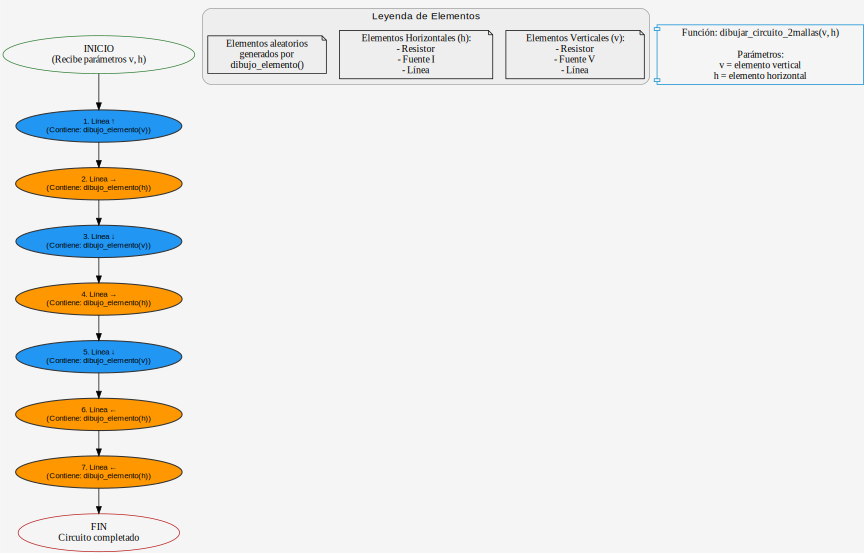

In [36]:
constructora_aleatorios()

#### Función simulación

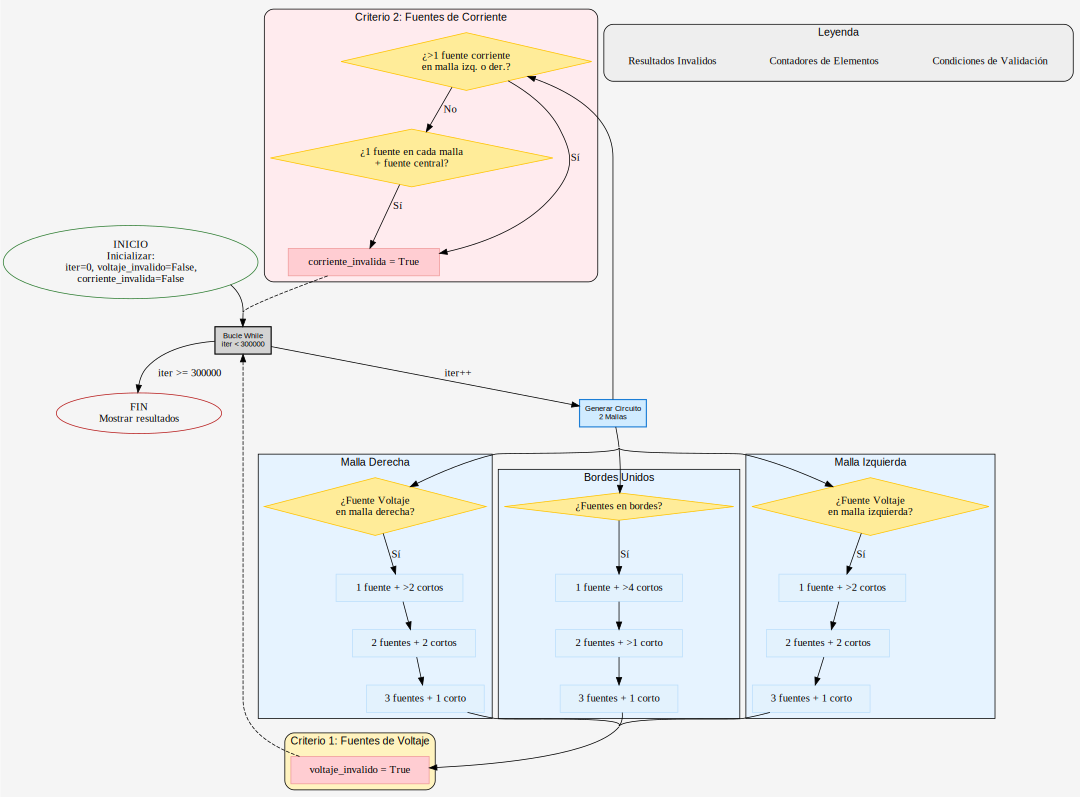

In [39]:
simulacion2()

## *Tercera actividad*

Para solucionar esta actividad, se debe implementar un generador de configuraciones de circuitos que cumplan con las **restricciones físicas y de diseño de una malla eléctrica simple**. La lógica del generador se basa en la selección aleatoria de elementos en posiciones específicas del circuito, controlada por un conjunto de **probabilidades condicionales** que aseguran que cada nuevo componente sea válido en relación con los ya seleccionados.

### Consideraciones clave para garantizar validez

1. **Estructura de la malla:**

Una malla simple consta de **cuatro elementos** conectados en un lazo cerrado: dos resistencias o fuentes horizontales (superior e inferior) y dos elementos verticales (izquierda y derecha).

Se representa con una matriz $H \in \mathbb{R}^{2 \times 1}$ para las componentes horizontales y un vector $V \in \mathbb{R}^{2 \times 1}$ para las componentes verticales.

2. **Restricciones de validez:**

- **Fuentes de corriente:** No puede haber más de **una fuente de corriente ($5$)** en toda la malla.
- **Fuentes de voltaje y cortos ($4$ y $2$):** No se permite que la malla esté compuesta únicamente por fuentes de voltaje y cortos, a excepción de cuando todos los elementos son cortos.

3. **Probabilidad condicional:**

Cada posición del circuito se llena de acuerdo con una **distribución de probabilidad** que depende de los elementos ya colocados.

Esta probabilidad se actualiza dinámicamente usando la función `prob_condicional_una_malla`, que ajusta las probabilidades según las reglas antes descritas.

4. **Visualización y verificación:**

Una vez generada una configuración válida, puede ser representada gráficamente con la función `generacircuito1malla`, la cual también puede mostrar las **probabilidades asociadas a cada elección**, permitiendo verificar visualmente el proceso de generación.

### Diagramas de flujo previo al código

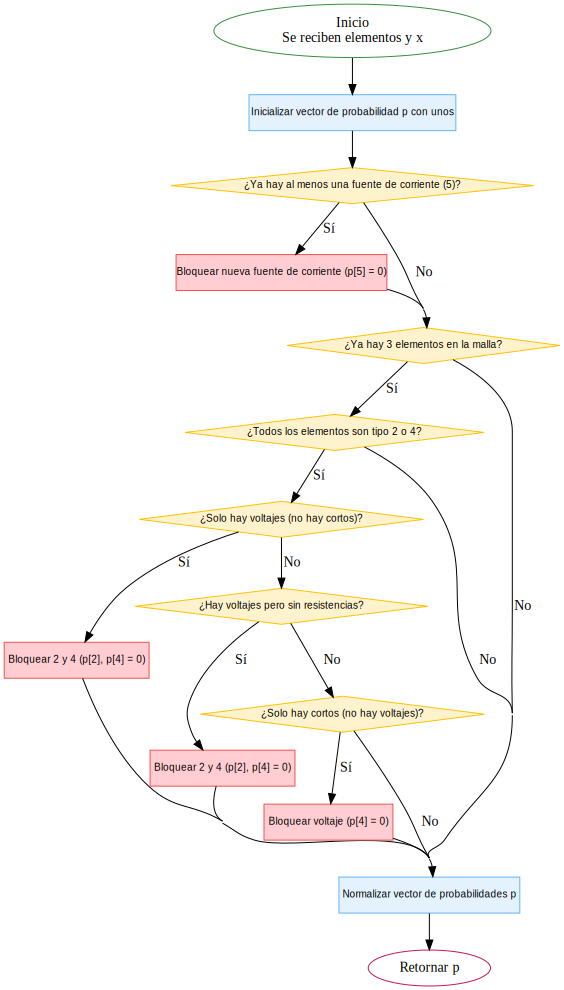

In [41]:
condicional_una_malla()

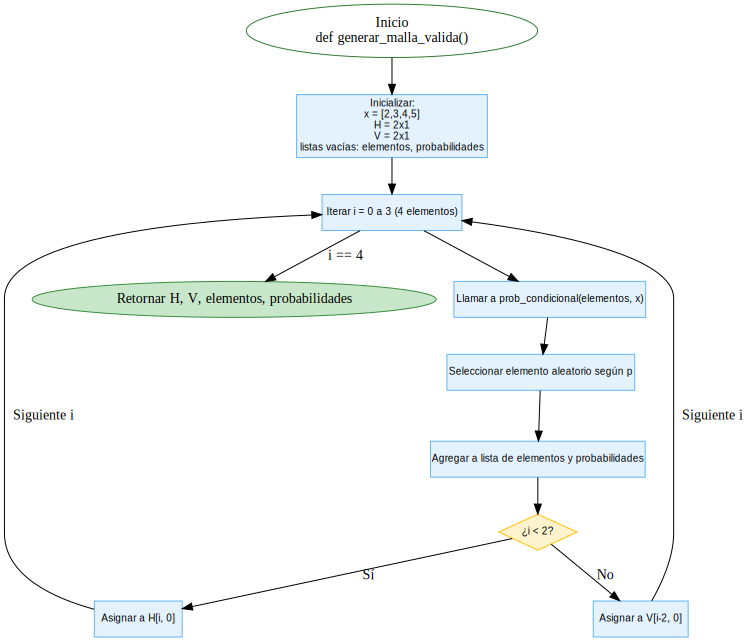

In [43]:
generar_diagrama_malla_v()

Una vez realizado el generador, se hace la validación de los circuitos haciendo uso del algoritmo de la Actividad 1 con 100000 experimentos, obteniendo que `nocumple_corriente`=0 y `nocumple_voltaje`=0. es decir, que todos los circuitos generados por los algoritmos son válidos.

## *Cuarta actividad*

Para solucionar esta actividad, se debe implementar un generador de configuraciones de circuitos que cumplan con las **restricciones físicas y de diseño de un circuito eléctrico de dos mallas**. La lógica del generador se basa en la selección aleatoria de elementos en posiciones específicas del circuito, controlada por un conjunto de **probabilidades condicionales** que aseguran de que cada nuevo componente sea válido en relación con los ya seleccionados.

### Consideraciones clave para garantizar validez

1. **Estructura del circuito:**

Un circuito de dos mallas consta de **siete elementos** conectados en dos lazos cerrados: dos elementos arriba (uno por cada malla), dos elementos abajo (uno por cada malla) y 3 elementos en las posiciones verticales (izquierda, medio, derecha).

Se representa con una matriz $H \in \mathbb{R}^{4 \times 1}$ para las componentes horizontales y un vector $V \in \mathbb{R}^{3 \times 1}$ para las componentes verticales.

2. **Restricciones de validez:**

- **Fuentes de corriente:** No puede haber **más de una fuente de corriente ($5$)** en una malla; No puede haber una fuente de corriente en el medio y una o más en cada malla.
- **Fuentes de voltaje y cortos ($4$ y $2$):** No se permite que las mallas estén compuestas únicamente por fuentes de voltaje y cortos, a excepción de cuando todos los elementos son cortos. Esto aplica para cada malla por separado y los bordes del circuito (todas las posiciones a excepción de la del medio).

3. **Probabilidad condicional:**

Cada posición del circuito se llena de acuerdo con una **distribución de probabilidad** que depende de los elementos ya colocados.

Esta probabilidad se actualiza dinámicamente usando la función `prob_condicional_dos_mallas`, que ajusta las probabilidades según las reglas antes descritas.

4. **Visualización y verificación:**

Una vez generada una configuración válida, puede ser representada gráficamente con la función `generacircuito2mallas`, la cual también puede mostrar las **probabilidades asociadas a cada elección**, permitiendo verificar visualmente el proceso de generación.





### Diagramas de flujo previo al código

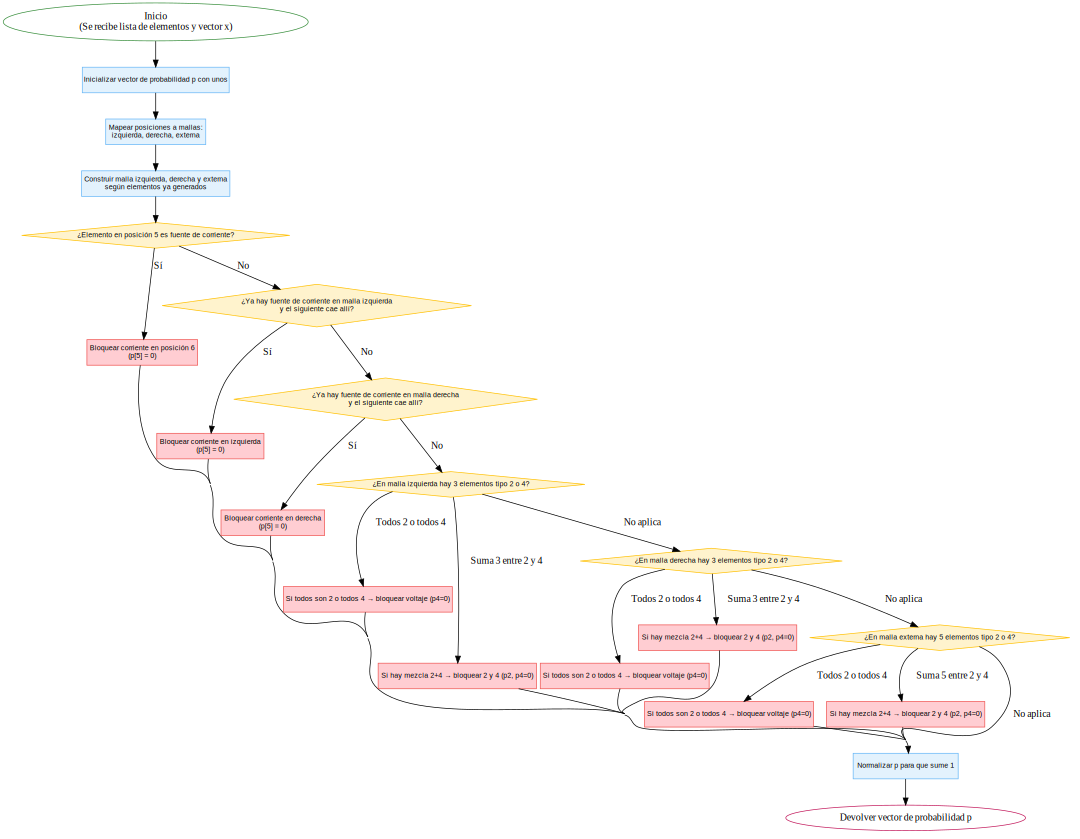

In [45]:
condicional_dos_mallas()

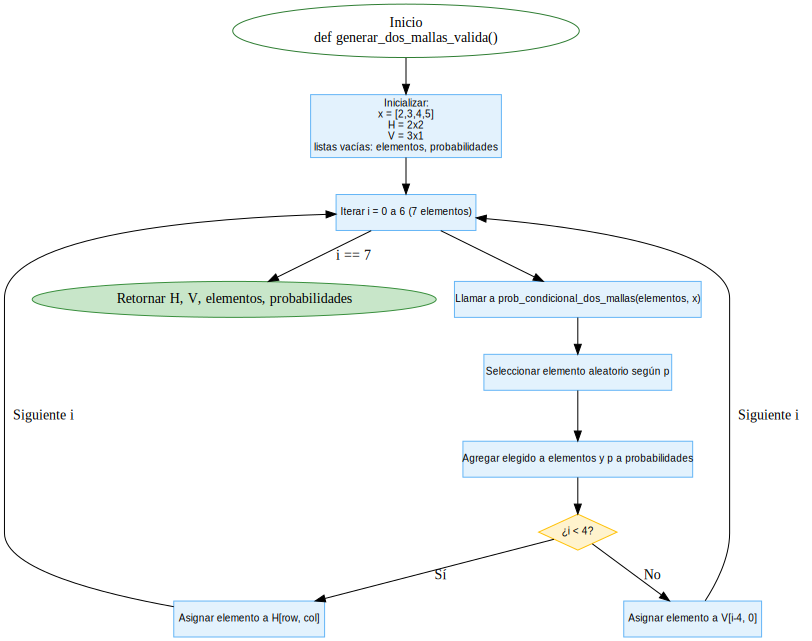

In [48]:
diagrama_dos_mallas_v()

Una vez realizado el generador, se hace la validación de los circuitos haciendo uso del algoritmo de la Actividad 2 con 100000 experimentos, obteniendo que `inv_total`=0. es decir, que todos los circuitos generados por los algoritmos son válidos.

## *Quinta actividad*

### Generador masivo de diagramas en pdf

Para la quinta actividad se propone un generador masivo de diagramas de circuitos resistivos de una malla y dos mallas unificado en pdf teniendo en cuenta todo lo anterior, es decir, que se deben generar los circuitos correctamente teniendo en cuenta las leyes de corriente y voltaje de Kirchhoff  para una y dos mallas, la función recibe n lanzamientos, los cuales, generan n circuitos y los unifica en un solo archivo pdf.

## **Conclusiones y trabajo futuro**

Este trabajo permitió explorar de manera sistemática la relación entre las restricciones topológicas en circuitos eléctricos y la construcción automatizada de configuraciones válidas, abordando de forma incremental las actividades propuestas. A través del desarrollo de simulaciones y generadores condicionales, se resolvieron los desafíos específicos de cada actividad sin recurrir a teoría analítica formal, sino mediante la identificación y codificación de reglas que emergen del análisis de configuraciones inválidas observadas empíricamente.

Uno de los principales aprendizajes fue evidenciar que incluso configuraciones aparentemente simples se ven afectadas por una complejidad combinatoria no trivial cuando se aplican restricciones físicas como la Ley de Voltajes de Kirchhoff. Esto justificó la implementación de funciones de probabilidad condicional como núcleo del generador, permitiendo evitar la validación posterior y garantizando la validez del circuito desde su construcción.

Más allá de resolver las actividades específicas, este enfoque mostró su potencial como base para sistemas de generación dinámica. La automatización del proceso de construcción y visualización de circuitos —incluyendo la exportación a PDF— abre la posibilidad de utilizar esta herramienta en contextos educativos, como en la creación de ejercicios aleatorios o en entornos interactivos para la enseñanza del análisis de circuitos.

A partir del comportamiento observado, se plantea como trabajo futuro el desarrollo de un modelo basado en cadenas de Markov, en el que cada estado represente una configuración parcial válida y las transiciones entre estados estén definidas por las reglas de validez establecidas. Esto permitiría no solo analizar con mayor formalidad la cobertura del espacio de soluciones, sino también optimizar la generación para reducir la probabilidad de bloqueos o redundancias.

En este contexto, para evitar combinaciones inválidas o estructuras repetitivas, se propone avanzar hacia un esquema de generación probabilística fundamentado en la teoría de procesos estocásticos, donde las decisiones de construcción estén guiadas por la dinámica de una cadena de estados previamente estructurada y evaluada.

## **Anexos**

In [10]:
import numpy as np
import math
import os
import schemdraw
import schemdraw.elements as elm
from PIL import Image
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import random

# Genera Circuito

In [11]:
def dibujo_elemento(va):
  """
  Genera un número aleatorio entre 1 y 5 y devuelve un mensaje correspondiente.
  """
  numero_aleatorio = va
  if numero_aleatorio == 1:
    pass
  elif numero_aleatorio == 2:
    mensaje = elm.Line()
  elif numero_aleatorio == 3:
    mensaje = elm.Resistor()
  elif numero_aleatorio == 4:
    mensaje = elm.SourceV()
  else:  # numero_aleatorio == 5
    mensaje = elm.SourceI()

  return mensaje

# Ejemplo de uso:
#numero_aleatorio = random.randint(2, 5)
#mensaje_obtenido = obtener_mensaje_aleatorio(numero_aleatorio)
#print(mensaje_obtenido)

In [12]:
def generacircuito1malla(filename, h, v, probabilidades=None): 
    if probabilidades is None:
        probabilidades = [np.array([1/4]*4) for _ in range(4)]  # 4 posiciones
    # print("Generador: ", type(probabilidades))

    with schemdraw.Drawing() as d:
        d.config(unit=5)

        def etiqueta(pos, nodo):
            p = probabilidades[pos]
            p_str = "\n".join([f"{i+2}:{p[i]:.2f}" for i in range(len(p))])
            return f"{nodo}\n{p_str}"

        # Posición 0: izquierda vertical
        I1 = dibujo_elemento(v[0]).up().label(etiqueta(2, "2"))

        # Posición 1: superior horizontal
        HS = dibujo_elemento(h[0, 0]).right().label(etiqueta(0, "0"))

        # Posición 2: derecha vertical
        D1 = dibujo_elemento(v[1]).down().label(etiqueta(3, "3"), loc="right", ofst=(3.4, 1.2))

        # Posición 3: inferior horizontal
        HI = dibujo_elemento(h[1, 0]).left().label(etiqueta(1, "1"), ofst=(0, 3))
        d.save(filename)
        

In [13]:
def generacircuito2mallas(filename, h, v, probabilidades=None):
    if probabilidades is None:
        probabilidades = [np.array([1/4]*4) for _ in range(7)]  # 7 posiciones

    def etiqueta(pos, nodo):
        return "\n".join([f"{nodo}"] + [f"{i+2}:{p:.2f}" for i, p in enumerate(probabilidades[pos])])

    with schemdraw.Drawing() as d:
        d.config(unit=5)

        # Posición 4 (v[0]): izquierda vertical
        V1 = dibujo_elemento(v[0]).up().label(etiqueta(4, "4"))

        # Posición 0 (h[0,0]): superior horizontal izquierda
        R1 = dibujo_elemento(h[0, 0]).right().label(etiqueta(0, "0"))

        d.push()
        # Posición 5 (v[1]): centro vertical entre mallas
        R3 = dibujo_elemento(v[1]).down().label(etiqueta(5, "5"))
        d.pop()

        # Posición 1 (h[0,1]): superior horizontal derecha
        I0 = dibujo_elemento(h[0, 1]).right().label(etiqueta(1, "1"))

        # Posición 6 (v[2]): derecha vertical
        I1 = dibujo_elemento(v[2]).down().label(etiqueta(6, "6"),loc="right", ofst=(3.4, 1.2))

        # Posición 3 (h[1,1]): inferior horizontal derecha
        L2 = dibujo_elemento(h[1, 1]).left().label(etiqueta(3, "3"), ofst=(0, 3))

        # Posición 2 (h[1,0]): inferior horizontal izquierda
        L3 = dibujo_elemento(h[1, 0]).left().label(etiqueta(2, "2"), ofst=(0, 3))
        d.save(filename)

# Funcion va

H:  [5 3]


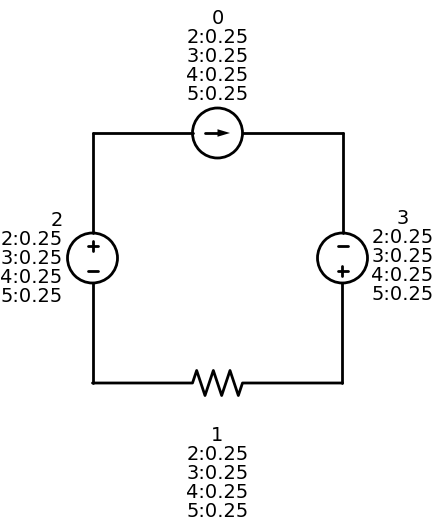

H:  [2 4 4 3]
V:  [[2]
 [2]
 [2]]


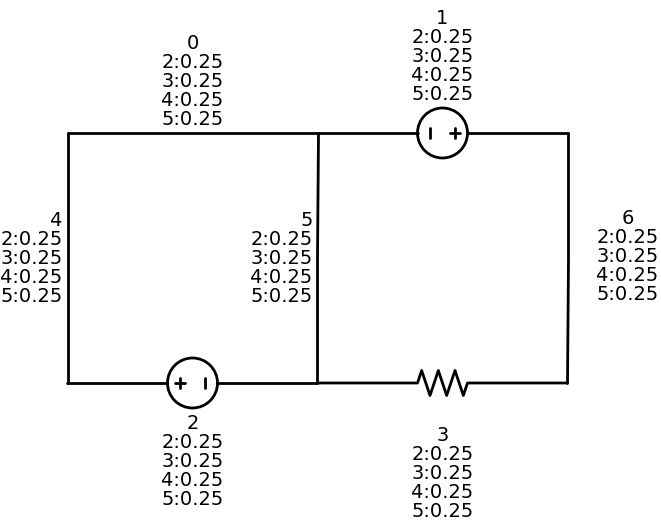

In [14]:

# Función equivalente a va(x, p, m, n) de MATLAB
def va(x, p, m, n):
    """
    Genera una matriz de m x n con elementos de x, siguiendo la distribución p.
    """
    return np.random.choice(x, size=(m, n), p=p)

# Ejemplo de prueba 1 malla
x = [2, 3, 4, 5]
p = [0.25, 0.25, 0.25, 0.25]
H = va(x, p, 2, 1)
V = va(x, p, 2, 1)

print("H: ",H.flatten())


generacircuito1malla('',H,V)

# Ejemplo de prueba 2 mallas
x = [2, 3, 4, 5]
H = va(x, p, 2, 2)
V = va(x, p, 3, 1)

print("H: ",H.flatten())
print("V: ",V)

generacircuito2mallas('',H,V)



# Actividad 1

In [15]:
# Simulación para la Actividad 1 (circuito de una malla)
# Evaluamos dos criterios de invalidez según las leyes de Kirchhoff

experimentos = 100_000
nocumple_corriente = 0
nocumple_voltaje = 0

for _ in range(experimentos):
    H = va(x, p, 1, 2)
    V = va(x, p, 1, 2)
    elementos = np.concatenate([H.flatten(), V.flatten()])

    # Criterio 1: más de una fuente de corriente (5)
    if np.sum(elementos == 5) > 1:
        nocumple_corriente += 1

    # Criterio 2: solo voltajes (4) y cortos (2), pero no todos cortos
    if np.all(np.isin(elementos, [2, 4])) and np.any(elementos == 4) and not np.all(elementos == 2):
        nocumple_voltaje += 1

# Resultados experimentales
fr_corriente = nocumple_corriente / experimentos
fr_voltaje = nocumple_voltaje / experimentos
fr_total = (nocumple_corriente + nocumple_voltaje) / experimentos

# Resultados teóricos
total_combinaciones = 4**4  # 4 elementos, 4 opciones cada uno
# Combinaciones con 2 o más fuentes de corriente
inv_corriente = (
    (math.comb(4, 2) * 3**2) +  # 2 fuentes de corriente
    (math.comb(4, 3) * 3) +     # 3 fuentes de corriente
    1                              # 4 fuentes de corriente
)
teorico_corriente = inv_corriente / total_combinaciones

# Combinaciones con solo 2 y 4 (16 en total), excluyendo todos 2
teorico_voltaje = (2**4 - 1) / total_combinaciones
teorico_total = teorico_corriente + teorico_voltaje

fr_corriente, fr_voltaje, fr_total, teorico_corriente, teorico_voltaje, teorico_total


(0.26224, 0.05837, 0.32061, 0.26171875, 0.05859375, 0.3203125)

# Actividad 2

In [16]:
# Simulación para la Actividad 2 (circuito de dos malla)
# Evaluamos tres criterios de invalidez según las leyes de Kirchhoff

# H, V, elementos_generados = generar_malla_valida()
# print(H, V, elementos_generados)

# Simulación
experimentos = 100_000
inv_fuentes_voltaje = 0
inv_fuentes_corriente = 0
inv_total = 0
inv_todas_resistencias = 1

for _ in range(experimentos):

    H = va(x, p, 1, 4).flatten()
    V = va(x, p, 1, 3).flatten()
    elementos = np.concatenate([H, V])

    # print("H: ", H.flatten())
    # print("V: ", V.flatten())
    # print("Elementos: ", elementos)
    
    malla_izq = np.array([elementos[i] for i in [0, 2, 4, 5]])
    malla_der = np.array([elementos[i] for i in [1, 3, 5, 6]])
    elem_medio = elementos[5]
    borde_malla = np.array([elementos[i] for i in [0,1,2,3,4,6]])

    # print("Malla Izq: ", malla_izq)
    # print("Malla Der: ", malla_der)
    # print("Borde Malla: ", borde_malla)
    # print("Elemento Medio: ", elem_medio)

    # Restricción 1: dos fuentes de voltaje en la misma malla
    corto = 2
    fuente_voltaje = 4
    fuente_corriente = 5
    invalido_voltaje = False
    invalido_corriente = False
    # --------- Malla izquierda [0,2,4] --------- #
    match np.sum(malla_izq == fuente_voltaje):
        case 1:
            if np.sum(malla_izq == corto) > 2:
                invalido_voltaje = True
        case 2:
            if np.sum(malla_izq == corto) > 1:
                invalido_voltaje = True
        case 3:
            if np.sum(malla_izq == corto) > 0:
                invalido_voltaje = True
        case 4:
            invalido_voltaje = True
    # --------- Malla derecha [1,3,6] --------- #
    match np.sum(malla_der == fuente_voltaje):
        case 1:
            if np.sum(malla_der == corto) > 2:
                invalido_voltaje = True
        case 2:
            if np.sum(malla_der == corto) > 1:
                invalido_voltaje = True
        case 3:
            if np.sum(malla_der == corto) > 0:
                invalido_voltaje = True
        case 4:
            invalido_voltaje = True
    # --------- Malla exterior --------- #
    match np.sum(borde_malla == fuente_voltaje):
        case 1:
            if np.sum(borde_malla == corto) > 4:
                invalido_voltaje = True
        case 2:
            if np.sum(borde_malla == corto) > 3:
                invalido_voltaje = True
        case 3:
            if np.sum(borde_malla == corto) > 2:
                invalido_voltaje = True
        case 4:
            if np.sum(borde_malla == corto) > 1:
                invalido_voltaje = True
        case 5:
            if np.sum(borde_malla == corto) > 0:
                invalido_voltaje = True
        case 6:
            invalido_voltaje = True

    # 
    if invalido_voltaje:
        inv_fuentes_voltaje += 1


    # Restricción 2: dos fuentes de corriente en la misma malla

    # Mallas sin el elemento compartido [5]
    malla_izq2 = np.array([elementos[i] for i in [0, 2, 4]])
    malla_der2 = np.array([elementos[i] for i in [1, 3, 6]])
    
    if (np.sum(malla_izq2 == fuente_corriente) > 1 or np.sum(malla_der2 == fuente_corriente) > 1):
        invalido_corriente = True
    elif np.sum(malla_izq2 == fuente_corriente) == 1 and np.sum(malla_der2 == fuente_corriente) == 1 and elem_medio == fuente_corriente:
        invalido_corriente = True

    if invalido_corriente:
        inv_fuentes_corriente += 1
    
    if invalido_voltaje or invalido_corriente:
        inv_total += 1


fr_1 = inv_fuentes_voltaje / experimentos
fr_2 = inv_fuentes_corriente / experimentos

print("Frecuencia invalidez voltaje: ", fr_1)
print("Frecuencia invalidez corriente: ", fr_2)
fr_inv = inv_total / experimentos
print("Frecuencia invalidez total: ", fr_inv)
fr_valido = 1 - fr_inv
print("Frecuencia válida: ", fr_valido)

# ---------------------------------- Cálculo teórico -------------------

# # P[V] - Voltajes 
# # 1933 / 16384 = 0.118
# # P[I] - Corrientes
# # 5449 / 16384 = 0.333

# total_combinaciones = 4**7 ## 16384 combinaciones posibles (7 elementos, 4 opciones cada uno)

# ---------------------- Corrientes I -------------------

inval_corriente_izq = (
    ((math.comb(3, 2) * 3) +     # 2 fuentes de corriente en una malla
    1) *                         # 3 fuentes de corriente en una malla
    4**4                         # 4 opciones y 4 elementos en la otra malla
) # = 2560

inval_corriente_der = (
    ((math.comb(3, 2) * 3) +     # 2 fuentes de corriente en una malla
    1) *                         # 3 fuentes de corriente en una malla
    4**4                         # 4 opciones y 4 elementos en la otra malla
) # = 2560

inval_corriente_medio = (
    (math.comb(3, 1) * 3**2) * # = 27 Exactamente 1 fuente de corriente en una malla
    (math.comb(3, 1) * 3**2) * # = 27 Exactamente 1 fuente de corriente en la otra malla
    1                          # 1 fuente de corriente en el medio
) # = 729

# Superposición de fuentes de corriente en ambas mallas
# 10 formas inválidas por cada malla independiente y 4 opciones para el medio = 10 * 10 * 4 = 400
# Invalidez = 2560 + 2560 + 729 - 400 = 5449


inv_corriente_medio = inval_corriente_der ** 2 * 1  # = 729

teorico_corriente = ((inval_corriente_izq + inval_corriente_der + inval_corriente_medio) - 400) / 16384

print("Invalidez teórica total (corriente): ", teorico_corriente) # = 5449

# ---------------------- Voltajes V -------------------

# Una malla (dos o más fuentes de voltaje)
inval_voltaje_izq = (
    (2 ** 4) *              # fuente de voltaje o corto (2 opciones) en cada posicion (4)
    4**3                     # 4 opciones y 3 posiciones restantes en la otra malla
) # = 16 * 64 = 1024

inval_voltaje_der = (
    (2 ** 4) *              # fuente de voltaje o corto (2 opciones) en cada posicion (4)
    4**3                     # 4 opciones y 3 posiciones restantes en la otra malla
) # = 16 * 64 = 1024

# 15 / 256 

inval_voltaje_ext = (
    (2 ** 6) *              # fuentes de voltaje o cortos (2 opciones) en cada posicion (6) 
    4**1                    # 4 opciones y 1 posicion restante (medio)
) # = 256

# Superposición de fuentes de voltaje en ambas mallas
# 2 elementos (voltaje - corto) en 3 posiciones por malla, 2 elementos válidos para el medio (corriente - resistencia)
# Invalidez = 2**3 * 2**3 * 2 = 128

# Superposición de fuentes de voltaje en una malla y la exterior
# 2 elementos (voltaje - corto) en 6 posiciones de la malla exterior, 2 elementos inválidos para el medio (voltaje - corto)
# Invalidez = 2**6 * 2 = 128

# Superposición de fuentes de voltaje en ambas mallas y la exterior 
# 2 elementos (voltaje - corto) en 3 posiciones por malla, 2 elementos inválidos para el medio (voltaje - corto)
# Invalidez = 2**3 * 2**3 * 2 = 128

# Se restan las combinaciones de solo cortos que cumplen LVK (115)

teorico_voltaje = (
    inval_voltaje_izq + 
    inval_voltaje_der + 
    inval_voltaje_ext - 
    128 - 128 - 128 + 128 - (115) # = 1933
) / 16384

print("Invalidez teórica total (voltaje): ", teorico_voltaje) # = 1933

teorico_total = teorico_corriente + teorico_voltaje - (300 / 16384)

print("Frecuencia invalidez total: ", teorico_total)

Frecuencia invalidez voltaje:  0.11937
Frecuencia invalidez corriente:  0.33132
Frecuencia invalidez total:  0.43223
Frecuencia válida:  0.56777
Invalidez teórica total (corriente):  0.33258056640625
Invalidez teórica total (voltaje):  0.11798095703125
Frecuencia invalidez total:  0.4322509765625


# Actividad 3

## Probabilidad condicional 1 malla

In [17]:
def prob_condicional(elementos, x):
    p = np.ones(len(x), dtype=float)

    # Regla 1: máximo una fuente de corriente
    if np.sum(np.array(elementos) == 5) >= 1:
        p[np.array(x) == 5] = 0

    # Regla 2: evitar que el circuito se forme solo con fuentes de voltaje y cortos
    # pero permitir si todos son cortos
    if len(elementos) == 3:
        # solo hay cortos (2) y voltajes (4)
        if all(e in [2, 4] for e in elementos):
            # si no hay cortos, no permitir más voltajes o cortos
            if 2 not in elementos:
                # todos son voltajes (no permitido)
                p[np.isin(x, [2, 4])] = 0
            # si hay fuentes de voltaje y no hay resistencias
            elif 4 in elementos and 3 not in elementos:
                # hay mezcla de 2 y 4, pero sin resistencias: no permitir más 2 ni 4
                p[np.isin(x, [2, 4])] = 0
            elif 2 in elementos and 4 not in elementos:
                # si todos los elementos son cortos (2), no permitir fuente de voltaje
                p[np.isin(x, [4])] = 0

    p = p / np.sum(p)
    return p

## Generador circuito de una malla

In [18]:

def generar_malla_valida():
    x = [2, 3, 4, 5]
    H = np.zeros((2, 1), dtype=int)
    V = np.zeros((2, 1), dtype=int)
    elementos = []
    probabilidades = []

    for i in range(4):
        p = prob_condicional(elementos, x)
        # print(p)
        elegido = np.random.choice(x, p=p)
        elementos.append(elegido)
        probabilidades.append(p)
        if i < 2:
            H[i, 0] = elegido
        else:
            V[i - 2, 0] = elegido
    # print(probabilidades)
    return H, V, elementos, probabilidades


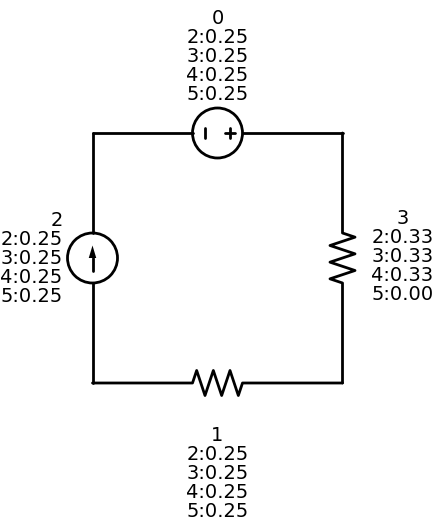

In [19]:

H, V, elementos_generados, probabilidades = generar_malla_valida()
# print(H, V, elementos_generados)
# print(probabilidades)

generacircuito1malla('', H, V, probabilidades)


## Valida Generador de una malla

In [20]:
# Validacion degenerador de una malla
# Se toma validacion de la actividad 1

experimentos = 100_000
nocumple_corriente = 0
nocumple_voltaje = 0

for _ in range(experimentos):
    H, V, e, probabilidades  = generar_malla_valida()
    elementos = np.concatenate([H.flatten(), V.flatten()])

    # Criterio 1: más de una fuente de corriente (5)
    if np.sum(elementos == 5) > 1:
        nocumple_corriente += 1
        print("No cumple corriente: ", elementos)

    # Criterio 2: solo voltajes (4) y cortos (2), pero no todos cortos
    if np.all(np.isin(elementos, [2, 4])) and np.any(elementos == 4) and not np.all(elementos == 2):
        nocumple_voltaje += 1
        print("No cumple voltaje: ", elementos)

# fr_corriente, fr_voltaje, fr_total, teorico_corriente, teorico_voltaje, teorico_total
print("No cumple corriente: ", nocumple_corriente)
print("No cumple voltaje: ", nocumple_voltaje)
print("No cumple total: ", nocumple_corriente + nocumple_voltaje)


No cumple corriente:  0
No cumple voltaje:  0
No cumple total:  0


# Actividad 4

## Probabilidad condicional 2 mallas

In [21]:
def prob_condicional_dos_mallas(elementos, x):
    p = np.ones(len(x), dtype=float)
    num_elem = len(elementos)

    # Mapeo corregido de posiciones a mallas
    izquierda = {0, 2, 4, 5}
    derecha = {1, 3, 5, 6}
    externa = {0, 1, 2, 3, 4, 6}

    def get_submalla(indices):
        return [elementos[i] for i in indices if i < len(elementos)]

    malla_izq = get_submalla(izquierda)
    malla_der = get_submalla(derecha)
    malla_ext = get_submalla(externa)

    siguiente = num_elem
    pertenece_izq = siguiente in izquierda
    pertenece_der = siguiente in derecha
    pertenece_ext = siguiente in externa

    # Reglas de invalidez por corriente
    if len(elementos) == 5:
        if elementos[4]==5:
          p[x.index(5)] = 0
    if pertenece_izq and malla_izq.count(5) >= 1:
        p[x.index(5)] = 0
    if pertenece_der and malla_der.count(5) >= 1:
        p[x.index(5)] = 0

    # Reglas de voltajes: no solo 2 y 4 con al menos un 4
    # def invalida_por_voltaje(malla):
    #     return all(e in [2, 4] for e in malla) and 3 not in malla and malla.count(4) >= 1

    # print("Malla Izq: ", malla_izq)
    # print("Malla Der: ", malla_der)
    # print("Malla Ext: ", malla_ext)

    if pertenece_izq:
        if malla_izq.count(2) == 3 or malla_izq.count(4) == 3:
            p[np.isin(x, [4])] = 0
        if (malla_izq.count(2) + malla_izq.count(4)) == 3:
            p[np.isin(x, [2,4])] = 0
    if pertenece_der:
        if malla_der.count(2) == 3 or malla_der.count(4) == 3 :
            p[np.isin(x, [4])] = 0
        if (malla_der.count(2)  + malla_der.count(4)) == 3: 
            p[np.isin(x, [2,4])] = 0
    if pertenece_ext:
        if malla_ext.count(2) == 5 or malla_ext.count(4) == 5 :
            p[np.isin(x, [4])] = 0
        if  (malla_ext.count(2) + malla_ext.count(4)) == 5:
            p[np.isin(x, [2,4])] = 0

    p = p / np.sum(p)
    return p

## Generador circuito de dos mallas

In [22]:
# Llena prinero los elementos del vector H y luego los de V
def generar_dos_mallas_valida():
    x = [2, 3, 4, 5]
    H = np.zeros((2, 2), dtype=int)  # Matriz 2x2
    V = np.zeros((3, 1), dtype=int)  # Vector columna 3x1
    elementos = []
    probabilidades = []

    for i in range(7):
        p = prob_condicional_dos_mallas(elementos, x)
        
        elegido = np.random.choice(x, p=p)
        elementos.append(elegido)

        if i < 4:
            row = i // 2
            col = i % 2
            # print("H: ", row ," ", col, " ",elegido)
            H[row, col] = elegido  # Llenar por filas
        else:
            # print("V: ", i - 4 ," ", 0, " ",elegido)
            V[i - 4, 0] = elegido  # Llenar vertical
        # print(p)
        # print("\n")
        probabilidades.append(p)


    return H, V, elementos, probabilidades



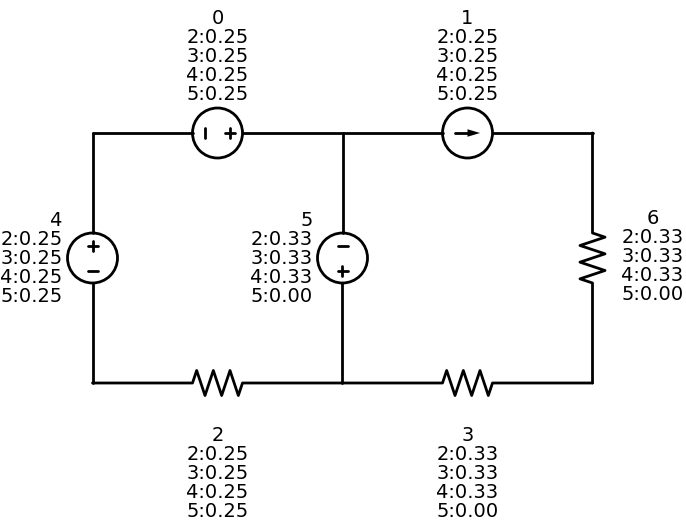

In [23]:
H, V, elementos_generados, probabilidades = generar_dos_mallas_valida()

# print(H, V, elementos_generados)
#  [2 2 4 2 5 4 2]
# H = np.array([[4, 2], [4, 2]])
# V= np.array([[4], [5], [4]])

generacircuito2mallas('',H, V,probabilidades)

## Valida generador dos mallas

In [24]:
# Simulación
experimentos = 100_000
inv_fuentes_voltaje = 0
inv_fuentes_corriente = 0
inv_total = 0
inv_todas_resistencias = 1

for _ in range(experimentos):

    H,V,e,p =generar_dos_mallas_valida()

    elementos = np.concatenate([H.flatten(), V.flatten()])

    malla_izq = np.array([elementos[i] for i in [0, 2, 4, 5]])
    malla_der = np.array([elementos[i] for i in [1, 3, 5, 6]])
    elem_medio = elementos[5]
    borde_malla = np.array([elementos[i] for i in [0,1,2,3,4,6]])

    # print("Malla Izq: ", malla_izq)
    # print("Malla Der: ", malla_der)
    # print("Borde Malla: ", borde_malla)
    # print("Elemento Medio: ", elem_medio)

    # Restricción 1: dos fuentes de voltaje en la misma malla
    corto = 2
    fuente_voltaje = 4
    fuente_corriente = 5
    invalido_voltaje = False
    invalido_corriente = False
    # --------- Malla izquierda [0,2,4] --------- #
    match np.sum(malla_izq == fuente_voltaje):
        case 1:
            if np.sum(malla_izq == corto) > 2:
                invalido_voltaje = True
        case 2:
            if np.sum(malla_izq == corto) > 1:
                invalido_voltaje = True
        case 3:
            if np.sum(malla_izq == corto) > 0:
                invalido_voltaje = True
        case 4:
            invalido_voltaje = True
    # --------- Malla derecha [1,3,6] --------- #
    match np.sum(malla_der == fuente_voltaje):
        case 1:
            if np.sum(malla_der == corto) > 2:
                invalido_voltaje = True
        case 2:
            if np.sum(malla_der == corto) > 1:
                invalido_voltaje = True
        case 3:
            if np.sum(malla_der == corto) > 0:
                invalido_voltaje = True
        case 4:
            invalido_voltaje = True
    # --------- Malla exterior --------- #
    match np.sum(borde_malla == fuente_voltaje):
        case 1:
            if np.sum(borde_malla == corto) > 4:
                invalido_voltaje = True
        case 2:
            if np.sum(borde_malla == corto) > 3:
                invalido_voltaje = True
        case 3:
            if np.sum(borde_malla == corto) > 2:
                invalido_voltaje = True
        case 4:
            if np.sum(borde_malla == corto) > 1:
                invalido_voltaje = True
        case 5:
            if np.sum(borde_malla == corto) > 0:
                invalido_voltaje = True
        case 6:
            invalido_voltaje = True

    # 
    if invalido_voltaje:
        print("Invalido voltaje elementos: ", elementos)
        inv_fuentes_voltaje += 1


    # Restricción 2: dos fuentes de corriente en la misma malla

    # Mallas sin el elemento compartido [5]
    malla_izq2 = np.array([elementos[i] for i in [0, 2, 4]])
    malla_der2 = np.array([elementos[i] for i in [1, 3, 6]])
    
    if (np.sum(malla_izq2 == fuente_corriente) > 1 or np.sum(malla_der2 == fuente_corriente) > 1):
        invalido_corriente = True
    elif np.sum(malla_izq2 == fuente_corriente) == 1 and np.sum(malla_der2 == fuente_corriente) == 1 and elem_medio == fuente_corriente:
        invalido_corriente = True

    if invalido_corriente:
        inv_fuentes_corriente += 1
    
    if invalido_voltaje or invalido_corriente:
        inv_total += 1

print("Frecuencia invalidez voltaje: ", inv_fuentes_voltaje / experimentos)
print("Frecuencia invalidez corriente: ", inv_fuentes_corriente / experimentos)
print("Frecuencia invalidez total: ", inv_total )
print("Frecuencia invalidez total 2: ", inv_fuentes_corriente + inv_fuentes_voltaje)
inv_total = inv_fuentes_voltaje + inv_fuentes_corriente
fr_inv = inv_total / experimentos
fr_valido = 1 - fr_inv
print("Frecuencia inválida: ", fr_inv)
print("Frecuencia válida: ", fr_valido)


Frecuencia invalidez voltaje:  0.0
Frecuencia invalidez corriente:  0.0
Frecuencia invalidez total:  0
Frecuencia invalidez total 2:  0
Frecuencia inválida:  0.0
Frecuencia válida:  1.0


# Actividad 5

## Generador masivo de diagramas en pdf

### Para una malla

[array([0.25, 0.25, 0.25, 0.25]), array([0.33333333, 0.33333333, 0.33333333, 0.        ]), array([0.33333333, 0.33333333, 0.33333333, 0.        ]), array([0.33333333, 0.33333333, 0.33333333, 0.        ])]


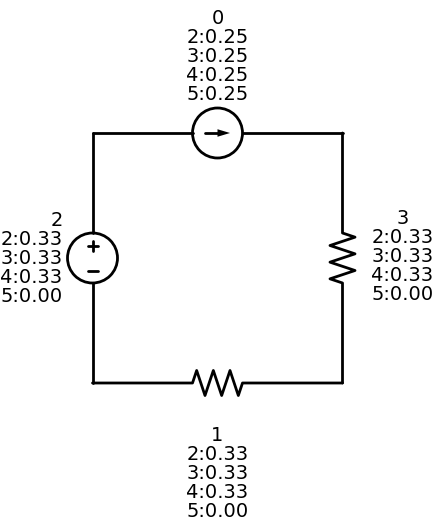

[array([0.25, 0.25, 0.25, 0.25]), array([0.25, 0.25, 0.25, 0.25]), array([0.25, 0.25, 0.25, 0.25]), array([0.25, 0.25, 0.25, 0.25])]


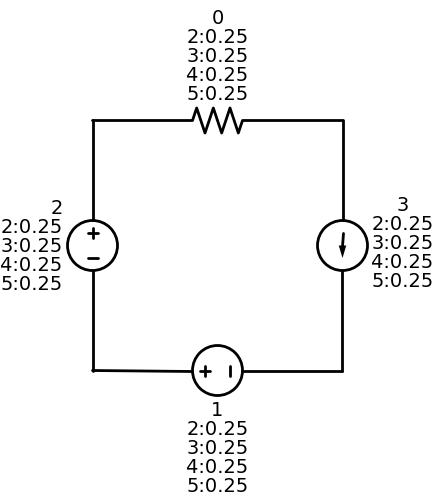

[array([0.25, 0.25, 0.25, 0.25]), array([0.25, 0.25, 0.25, 0.25]), array([0.25, 0.25, 0.25, 0.25]), array([0.25, 0.25, 0.25, 0.25])]


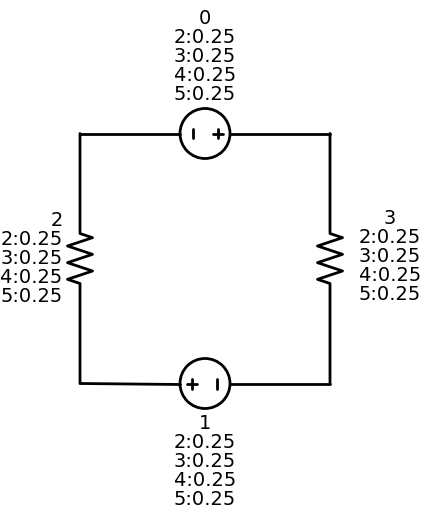

[array([0.25, 0.25, 0.25, 0.25]), array([0.25, 0.25, 0.25, 0.25]), array([0.33333333, 0.33333333, 0.33333333, 0.        ]), array([0.33333333, 0.33333333, 0.33333333, 0.        ])]


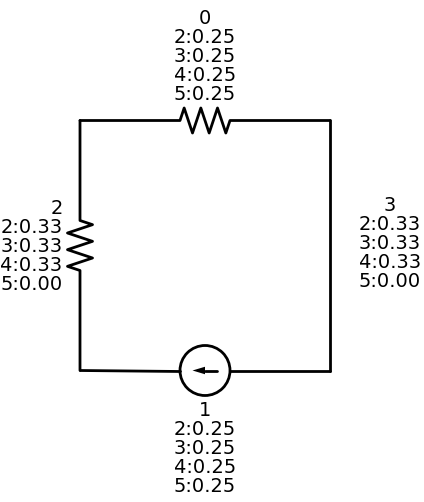

[array([0.25, 0.25, 0.25, 0.25]), array([0.25, 0.25, 0.25, 0.25]), array([0.25, 0.25, 0.25, 0.25]), array([0.25, 0.25, 0.25, 0.25])]


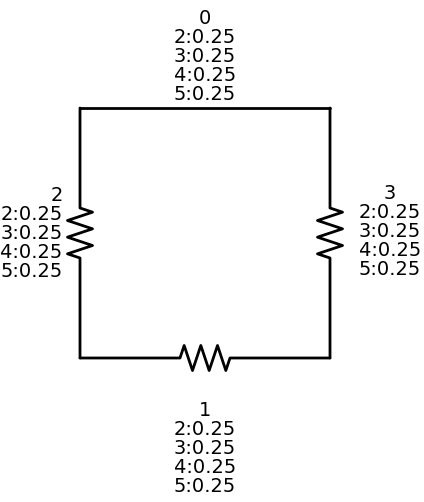

✅ PDF generado: circuitos_una_malla.pdf


In [25]:
# Carpeta temporal
img_folder = 'circuitos_temp'
os.makedirs(img_folder, exist_ok=True)

# Lista para guardar las rutas de imágenes
image_paths = []

# Número de circuitos a generar
n = 5

for i in range(n):
    H, V, elementos_generados, probabilidades = generar_malla_valida()
    # print(H, V, elementos_generados)
    print(probabilidades)    
    filename = os.path.join(img_folder, f'circuito_{i+1}.png')
    generacircuito1malla(filename, H, V, probabilidades)
    image_paths.append(filename)

pdf_filename = 'circuitos_una_malla.pdf'
c = canvas.Canvas(pdf_filename, pagesize=letter)
width, height = letter

for idx, img_path in enumerate(image_paths):
    c.setFont("Helvetica-Bold", 16)
    c.drawString(100, height - 50, f'Circuito unimalla: {idx + 1}')
    c.drawImage(img_path, 100, 200, width=400, preserveAspectRatio=True, mask='auto')
    c.showPage()

c.save()
print(f'✅ PDF generado: {pdf_filename}')

for img_path in image_paths:
    os.remove(img_path)

if not os.listdir(img_folder):
    os.rmdir(img_folder)

### Para dos mallas

[[2 4]
 [5 3]] [[4]
 [4]
 [3]] [2, 4, 5, 3, 4, 4, 3]


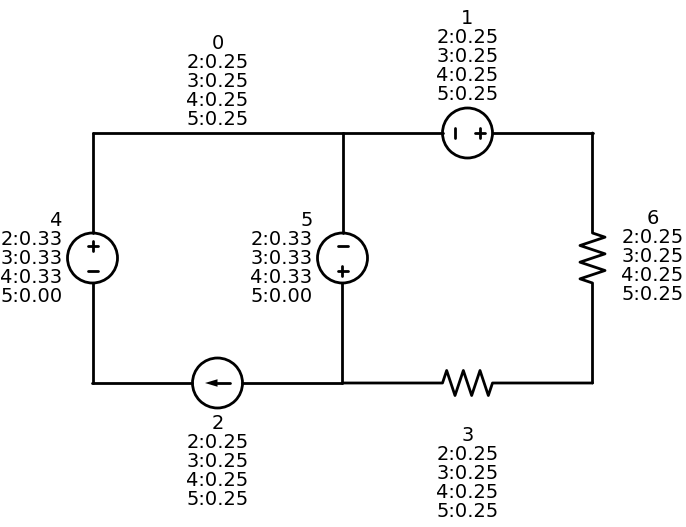

[[2 2]
 [5 5]] [[3]
 [3]
 [2]] [2, 2, 5, 5, 3, 3, 2]


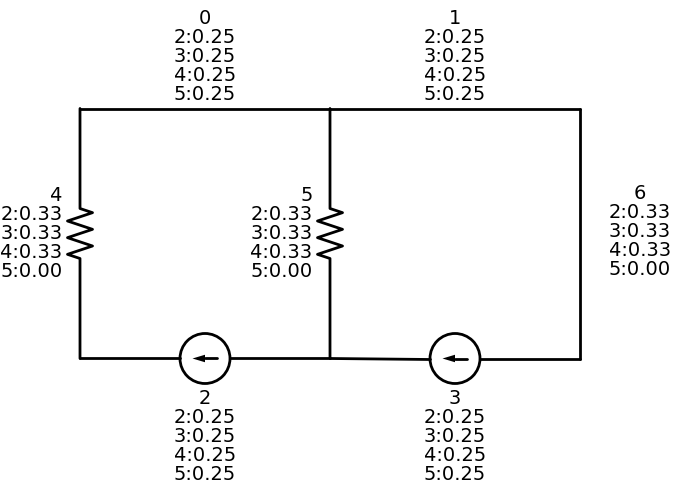

[[4 3]
 [4 2]] [[5]
 [3]
 [3]] [4, 3, 4, 2, 5, 3, 3]


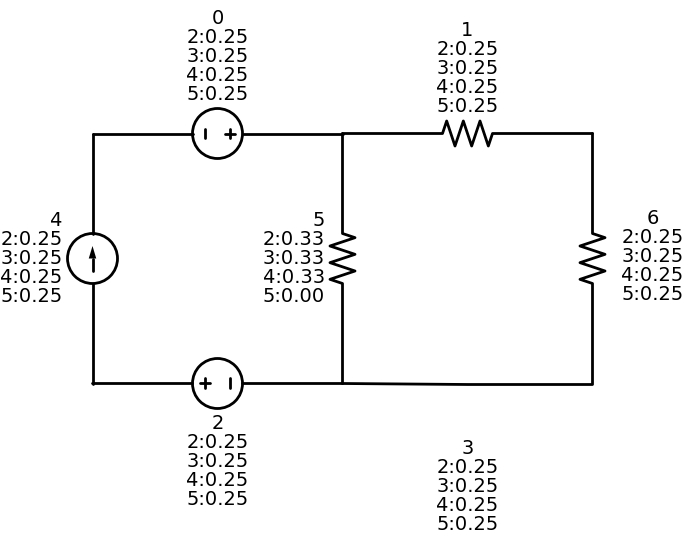

[[5 2]
 [3 4]] [[3]
 [4]
 [5]] [5, 2, 3, 4, 3, 4, 5]


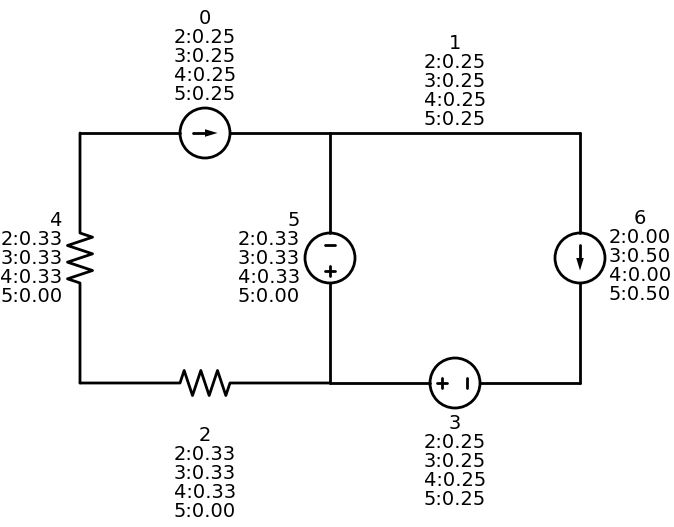

[[2 2]
 [4 2]] [[4]
 [3]
 [3]] [2, 2, 4, 2, 4, 3, 3]


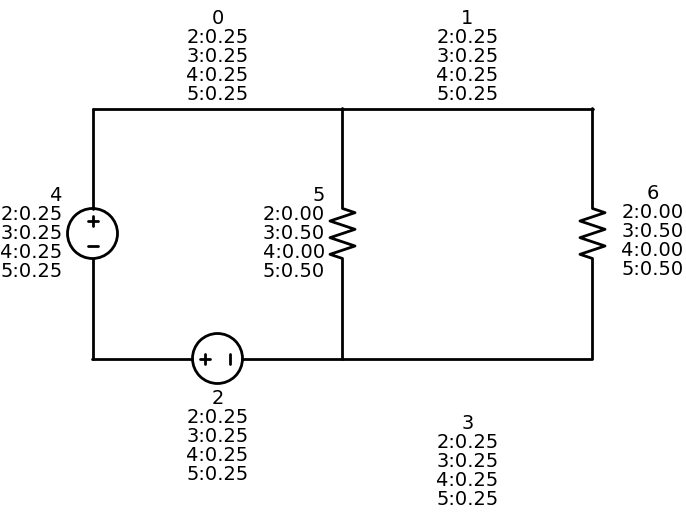

✅ PDF generado: todos_los_circuitos_2mallas.pdf


In [26]:
#  [2 2 4 2 5 4 2]
# H = np.array([[4, 2], [4, 2]])
# V= np.array([[4], [5], [4]])

# Carpeta temporal
img_folder = 'circuitos_temp'
os.makedirs(img_folder, exist_ok=True)

# Lista para guardar las rutas de imágenes
image_paths2 = []

# Número de circuitos a generar
n = 5

for i in range(n):
    H, V, elementos_generados, probabilidades = generar_dos_mallas_valida()
    print(H, V, elementos_generados)
    filename2 = os.path.join(img_folder, f'circuito_doble_malla_{i+1}.png')
    generacircuito2mallas(filename2, H, V,probabilidades)
    image_paths2.append(filename2)

# Crear el PDF
pdf_filename2 = 'todos_los_circuitos_2mallas.pdf'
c = canvas.Canvas(pdf_filename2, pagesize=letter)
width, height = letter

for idx, img_path2 in enumerate(image_paths2):
    c.setFont("Helvetica-Bold", 16)
    c.drawString(100, height - 50, f'Circuito doble malla: {idx + 1}')
    c.drawImage(img_path2, 100, 200, width=400, preserveAspectRatio=True, mask='auto')
    c.showPage()

c.save()
print(f'✅ PDF generado: {pdf_filename2}')

# Eliminar imágenes
for img_path in image_paths2:
    os.remove(img_path)

if not os.listdir(img_folder):
    os.rmdir(img_folder)

## Codigo generador de diagramas 

In [29]:
def genera_aleatorio():    
    from graphviz import Digraph
    
    # Configuración del diagrama de función
    func_dot = Digraph('ElementFlow', filename='element_func.gv')
    func_dot.attr(rankdir='TB',
                  size='8,10',
                  bgcolor='#fff9f9',
                  fontname='Arial',
                  label='Función Auxiliar: dibujo_elemento(va)\nGeneración de Elementos Aleatorios\n\n',
                  labelloc='t')
    
    # Estilo para casos
    case_style = {
        'shape': 'diamond',
        'style': 'filled',
        'fontname': 'Arial',
        'fontsize': '11'
    }
    
    # Nodos
    func_dot.node('FStart', 'INICIO\n(Recibe va)', shape='component', fillcolor='#d1e7dd', color='#0a5c36')
    func_dot.node('Case1', 'va == 1\nNo elemento', fillcolor='#f8d7da', color='#842029', **case_style)
    func_dot.node('Case2', 'va == 2\nLínea', fillcolor='#d1e7dd', color='#0a5c36', **case_style)
    func_dot.node('Case3', 'va == 3\nResistor', fillcolor='#d1e7dd', color='#0a5c36', **case_style)
    func_dot.node('Case4', 'va == 4\nFuente Voltaje', fillcolor='#d1e7dd', color='#0a5c36', **case_style)
    func_dot.node('Case5', 'va == 5\nFuente Corriente', fillcolor='#d1e7dd', color='#0a5c36', **case_style)
    func_dot.node('FEnd', 'RETORNA\nElemento/None', shape='component', fillcolor='#d1e7dd', color='#0a5c36')
    
    # Conexiones en forma de árbol
    func_dot.edge('FStart', 'Case1')
    func_dot.edge('Case1', 'Case2', label='else')
    func_dot.edge('Case2', 'Case3', label='else')
    func_dot.edge('Case3', 'Case4', label='else')
    func_dot.edge('Case4', 'Case5', label='else')
    func_dot.edge('Case5', 'FEnd')
    
    # Leyenda de elementos
    with func_dot.subgraph(name='cluster_legend') as legend:
        legend.attr(label='Tipos de Elementos',
                    style='rounded,filled',
                    fillcolor='#e7f5ff',
                    color='#1864ab')
        legend.node('L1', 'Línea: Componente básico', shape='plaintext')
        legend.node('L2', 'Resistor: Elemento pasivo', shape='plaintext')
        legend.node('L3', 'FuenteV: Genera voltaje', shape='plaintext')
        legend.node('L4', 'FuenteI: Genera corriente', shape='plaintext')
    
    return func_dot

In [33]:
def simulacion():
    
    from graphviz import Digraph
    
    dot = Digraph('LoopValidation', filename='loop_validation.gv')
    dot.attr(rankdir='TB', size='10,8', bgcolor='#f8f9fa', fontname='Helvetica')
    
    # ===== ESTILOS =====
    node_style = {
        'style': 'filled',
        'fontname': 'Helvetica',
        'fontsize': '11',
        'shape': 'box',
        'penwidth': '1.5'
    }
    
    cond_style = {
        'shape': 'diamond',
        'fillcolor': '#ffec99',
        'color': '#ffc300',
        'fontname': 'Helvetica',
        'fontsize': '10'
    }
    
    # ===== NODOS PRINCIPALES =====
    dot.node('Start', 'INICIO\nInicializar:\nx=0, y=0, i=0', 
             shape='ellipse', fillcolor='#40c057', color='#2b8a3e')
    
    dot.node('Loop', 'Bucle While\ni < 100000', 
             fillcolor='#e9ecef', color='#495057', **node_style)
    
    dot.node('GenArray', 'Generar array aleatorio\n(de elementos del circuito)', 
             fillcolor='#d0ebff', color='#1c7ed6', **node_style)
    
    # ===== CONDICIÓN X =====
    with dot.subgraph(name='cluster_x') as x_cluster:
        x_cluster.attr(label='más de una fuente de corriente', style='rounded,filled',
                      fillcolor='#fff3bf', color='#ffd43b')
        
        x_cluster.node('Check5', 'Contar elementos == fuente_corriente \n>= 2 elementos?', **cond_style)
        x_cluster.node('IncX', 'x += 1', 
                      fillcolor='#b2f2bb', color='#40c057', **node_style)
    
    # ===== CONDICIÓN Y =====
    with dot.subgraph(name='cluster_y') as y_cluster:
        y_cluster.attr(label='cuando hay solo fuente_voltaje y cortos', style='rounded,filled',
                      fillcolor='#ffdeeb', color='#f06595')
        
        y_cluster.node('CheckAll24', '¿Todos elementos\nson fuente_voltaje o cortos?', **cond_style)
        y_cluster.node('CheckAny4', '¿hay almenos una fuente de voltaje?', **cond_style)
        y_cluster.node('CheckAll2', '¿todos los elementos NO son cortocircuitos?', **cond_style)
        y_cluster.node('IncY', 'y += 1', 
                      fillcolor='#ffc9c9', color='#f03e3e', **node_style)
    
    dot.node('End', 'FIN\nMostrar x, y', 
             shape='ellipse', fillcolor='#fa5252', color='#c92a2a')
    
    # ===== CONEXIONES PRINCIPALES =====
    dot.edge('Start', 'Loop')
    dot.edge('Loop', 'GenArray', label='i++')
    dot.edge('GenArray', 'Check5')
    
    # Flujo Condición X
    dot.edge('Check5', 'IncX', label='Sí')
    dot.edge('Check5', 'CheckAll24', label='No')
    
    # Flujo Condición Y
    dot.edge('CheckAll24', 'CheckAny4', label='Sí')
    dot.edge('CheckAll24', 'Loop', label='No', style='dashed')
    dot.edge('CheckAny4', 'CheckAll2', label='Sí')
    dot.edge('CheckAny4', 'Loop', label='No', style='dashed')
    dot.edge('CheckAll2', 'IncY', label='Sí')
    dot.edge('CheckAll2', 'Loop', label='No', style='dashed')
    
    # Conexiones finales
    dot.edge('IncX', 'Loop', style='dashed')
    dot.edge('IncY', 'Loop', style='dashed')
    dot.edge('Loop', 'End', label='i >= 100000')
    
    # ===== NOTAS =====
    dot.node('NoteX', 'x: condición criterio 1 para circuito de una malla', 
             shape='note', fillcolor='#e3fafc', color='#1098ad')
    dot.node('NoteY', 'y: condición criterio 2 para circuito de una malla', 
             shape='note', fillcolor='#f3d9fa', color='#9c36b5')
    
    dot.edge('NoteX', 'Check5', style='invis')
    dot.edge('NoteY', 'CheckAll24', style='invis')
    
    return dot

In [35]:
def constructora_aleatorios():
    
    from graphviz import Digraph
    
    dot = Digraph('TwoMeshCircuit', filename='circuit_diagram.gv')
    dot.attr(rankdir='TB', size='12,10', bgcolor='#f5f5f5', fontname='Arial')
    
    # Custom styles
    node_style = {
        'style': 'filled,rounded',
        'fontname': 'Arial',
        'fontsize': '11',
        'penwidth': '1.5'
    }
    
    # Main nodes
    dot.node('Start', 'INICIO\n(Recibe parámetros v, h)', 
             shape='ellipse', fillcolor='#4CAF50', color='#2E7D32')
    
    steps = [
        ('1', '1. Línea ↑\n(Contiene: dibujo_elemento(v))', '#2196F3'),
        ('2', '2. Línea →\n(Contiene: dibujo_elemento(h))', '#FF9800'),
        ('3', '3. Línea ↓\n(Contiene: dibujo_elemento(v))', '#2196F3'),
        ('4', '4. Línea →\n(Contiene: dibujo_elemento(h))', '#FF9800'),
        ('5', '5. Línea ↓\n(Contiene: dibujo_elemento(v))', '#2196F3'),
        ('6', '6. Línea ←\n(Contiene: dibujo_elemento(h))', '#FF9800'),
        ('7', '7. Línea ←\n(Contiene: dibujo_elemento(h))', '#FF9800')
    ]
    
    for id, label, color in steps:
        dot.node(id, label, fillcolor=color, color='#333333', **node_style)
    
    dot.node('End', 'FIN\nCircuito completado', 
             shape='ellipse', fillcolor='#F44336', color='#B71C1C')
    
    # Connections
    dot.edges([
        ('Start', '1'),
        ('1', '2'),
        ('2', '3'),
        ('3', '4'),
        ('4', '5'),
        ('5', '6'),
        ('6', '7'),
        ('7', 'End')
    ])
    
    # Legend
    with dot.subgraph(name='cluster_legend') as legend:
        legend.attr(label='Leyenda de Elementos', style='rounded,filled',
                   fillcolor='#EEEEEE', color='#9E9E9E')
        legend.node('v_note', 'Elementos Verticales (v):\n- Resistor\n- Fuente V\n- Línea', shape='note')
        legend.node('h_note', 'Elementos Horizontales (h):\n- Resistor\n- Fuente I\n- Línea', shape='note')
        legend.node('rand_note', 'Elementos aleatorios\ngenerados por\ndibujo_elemento()', shape='note')
    
    # Function call note
    dot.node('func_note', 'Función: dibujar_circuito_2mallas(v, h)\n\nParámetros:\nv = elemento vertical\nh = elemento horizontal',
             shape='component', fillcolor='#E1F5FE', color='#0288D1')
    
    return dot

In [38]:
def simulacion2():    
    from graphviz import Digraph
    
    dot = Digraph('CircuitValidation', filename='circuit_validation.gv')
    dot.attr(rankdir='TB', size='15,20', bgcolor='#f5f5f5', fontname='Arial', concentrate='true')
    
    # ===== STYLES =====
    main_style = {'style': 'filled', 'fontname': 'Arial', 'fontsize': '10', 'shape': 'box', 'penwidth': '1.5'}
    cond_style = {'shape': 'diamond', 'style': 'filled', 'fillcolor': '#ffec99', 'color': '#ffc300'}
    count_style = {'shape': 'box', 'style': 'filled', 'fillcolor': '#e3f2fd', 'color': '#bbdefb'}
    invalid_style = {'shape': 'box', 'style': 'filled', 'fillcolor': '#ffcdd2', 'color': '#ef9a9a'}
    
    # ===== MAIN STRUCTURE =====
    dot.node('Start', 'INICIO\nInicializar:\niter=0, voltaje_invalido=False,\ncorriente_invalida=False', 
             shape='ellipse', fillcolor='#4CAF50', color='#2E7D32')
    
    dot.node('Loop', 'Bucle While\niter < 300000', **main_style)
    dot.node('Gen', 'Generar Circuito\n2 Mallas', fillcolor='#d0ebff', color='#1c7ed6', **main_style)
    
    # ===== CRITERIO 1: VOLTAJE =====
    with dot.subgraph(name='cluster_voltaje') as v_cluster:
        v_cluster.attr(label='Criterio 1: Fuentes de Voltaje', style='rounded,filled', fillcolor='#fff3bf')
        
        # Malla Izquierda
        with dot.subgraph(name='cluster_left') as left:
            left.attr(label='Malla Izquierda', style='filled', fillcolor='#e6f3ff')
            left.node('V_L1', '¿Fuente Voltaje\nen malla izquierda?', **cond_style)
            left.node('V_L1_1', '1 fuente + >2 cortos', **count_style)
            left.node('V_L1_2', '2 fuentes + 2 cortos', **count_style)
            left.node('V_L1_3', '3 fuentes + 1 corto', **count_style)
            left.edge('V_L1', 'V_L1_1', label='Sí')
            left.edge('V_L1_1', 'V_L1_2')
            left.edge('V_L1_2', 'V_L1_3')
        
        # Malla Derecha
        with dot.subgraph(name='cluster_right') as right:
            right.attr(label='Malla Derecha', style='filled', fillcolor='#e6f3ff')
            right.node('V_R1', '¿Fuente Voltaje\nen malla derecha?', **cond_style)
            right.node('V_R1_1', '1 fuente + >2 cortos', **count_style)
            right.node('V_R1_2', '2 fuentes + 2 cortos', **count_style)
            right.node('V_R1_3', '3 fuentes + 1 corto', **count_style)
            right.edge('V_R1', 'V_R1_1', label='Sí')
            right.edge('V_R1_1', 'V_R1_2')
            right.edge('V_R1_2', 'V_R1_3')
        
        # Bordes
        with dot.subgraph(name='cluster_border') as border:
            border.attr(label='Bordes Unidos', style='filled', fillcolor='#e6f3ff')
            border.node('V_B1', '¿Fuentes en bordes?', **cond_style)
            border.node('V_B1_1', '1 fuente + >4 cortos', **count_style)
            border.node('V_B1_2', '2 fuentes + >1 corto', **count_style)
            border.node('V_B1_3', '3 fuentes + 1 corto', **count_style)
            border.edge('V_B1', 'V_B1_1', label='Sí')
            border.edge('V_B1_1', 'V_B1_2')
            border.edge('V_B1_2', 'V_B1_3')
        
        v_cluster.node('SetV', 'voltaje_invalido = True', **invalid_style)
    
    # ===== CRITERIO 2: CORRIENTE =====
    with dot.subgraph(name='cluster_corriente') as c_cluster:
        c_cluster.attr(label='Criterio 2: Fuentes de Corriente', style='rounded,filled', fillcolor='#ffebee')
        
        c_cluster.node('C1', '¿>1 fuente corriente\nen malla izq. o der.?', **cond_style)
        c_cluster.node('C2', '¿1 fuente en cada malla\n+ fuente central?', **cond_style)
        c_cluster.node('SetC', 'corriente_invalida = True', **invalid_style)
        
        c_cluster.edge('C1', 'SetC', label='Sí')
        c_cluster.edge('C1', 'C2', label='No')
        c_cluster.edge('C2', 'SetC', label='Sí')
    
    # ===== CONNECTIONS =====
    dot.edge('Start', 'Loop')
    dot.edge('Loop', 'Gen', label='iter++')
    dot.edge('Gen', 'V_L1')
    dot.edge('Gen', 'V_R1')
    dot.edge('Gen', 'V_B1')
    dot.edge('Gen', 'C1')
    
    # Connect validation results
    dot.edge('V_L1_3', 'SetV')
    dot.edge('V_R1_3', 'SetV')
    dot.edge('V_B1_3', 'SetV')
    dot.edge('SetV', 'Loop', style='dashed')
    dot.edge('SetC', 'Loop', style='dashed')
    
    dot.node('End', 'FIN\nMostrar resultados', shape='ellipse', fillcolor='#F44336', color='#B71C1C')
    dot.edge('Loop', 'End', label='iter >= 300000')
    
    # ===== LEGEND =====
    with dot.subgraph(name='cluster_legend') as legend:
        legend.attr(label='Leyenda', style='rounded,filled', fillcolor='#eeeeee')
        legend.node('L1', 'Condiciones de Validación', shape='plaintext')
        legend.node('L2', 'Contadores de Elementos', shape='plaintext')
        legend.node('L3', 'Resultados Invalidos', shape='plaintext')
    
    return dot

In [40]:
def condicional_una_malla():
        
    from graphviz import Digraph
    
    dot = Digraph('ProbCondicionalUnaMalla', filename='prob_condicional_una_malla.gv')
    dot.attr(rankdir='TB', size='15,20', bgcolor='#ffffff', fontname='Arial', concentrate='true')
    
    # Estilos
    main_style = {'style': 'filled', 'shape': 'box', 'fontsize': '10', 'fontname': 'Arial', 'fillcolor': '#e3f2fd', 'color': '#64b5f6'}
    cond_style = {'style': 'filled', 'shape': 'diamond', 'fontsize': '10', 'fontname': 'Arial', 'fillcolor': '#fff3cd', 'color': '#ffc107'}
    block_style = {'style': 'filled', 'shape': 'box', 'fontsize': '10', 'fontname': 'Arial', 'fillcolor': '#ffcdd2', 'color': '#ef5350'}
    
    # Nodos
    dot.node('start', 'Inicio\nSe reciben elementos y x', shape='ellipse', fillcolor='#c8e6c9', color='#388e3c')
    dot.node('init', 'Inicializar vector de probabilidad p con unos', **main_style)
    
    # Corriente
    dot.node('cond_corr', '¿Ya hay al menos una fuente de corriente (5)?', **cond_style)
    dot.node('bloq_corr', 'Bloquear nueva fuente de corriente (p[5] = 0)', **block_style)
    
    # Voltaje y cortos - solo si hay 3 elementos
    dot.node('cond_len', '¿Ya hay 3 elementos en la malla?', **cond_style)
    dot.node('cond_24', '¿Todos los elementos son tipo 2 o 4?', **cond_style)
    
    dot.node('solo_4', '¿Solo hay voltajes (no hay cortos)?', **cond_style)
    dot.node('bloq_solo_4', 'Bloquear 2 y 4 (p[2], p[4] = 0)', **block_style)
    
    dot.node('mezcla_24', '¿Hay voltajes pero sin resistencias?', **cond_style)
    dot.node('bloq_mezcla_24', 'Bloquear 2 y 4 (p[2], p[4] = 0)', **block_style)
    
    dot.node('solo_2', '¿Solo hay cortos (no hay voltajes)?', **cond_style)
    dot.node('bloq_solo_2', 'Bloquear voltaje (p[4] = 0)', **block_style)
    
    # Final
    dot.node('norm', 'Normalizar vector de probabilidades p', **main_style)
    dot.node('ret', 'Retornar p', shape='ellipse', fillcolor='#f8bbd0', color='#c2185b')
    
    # Conexiones
    dot.edge('start', 'init')
    dot.edge('init', 'cond_corr')
    dot.edge('cond_corr', 'bloq_corr', label='Sí')
    dot.edge('cond_corr', 'cond_len', label='No')
    dot.edge('bloq_corr', 'cond_len')
    
    dot.edge('cond_len', 'cond_24', label='Sí')
    dot.edge('cond_len', 'norm', label='No')
    
    dot.edge('cond_24', 'solo_4', label='Sí')
    dot.edge('cond_24', 'norm', label='No')
    
    dot.edge('solo_4', 'bloq_solo_4', label='Sí')
    dot.edge('solo_4', 'mezcla_24', label='No')
    dot.edge('mezcla_24', 'bloq_mezcla_24', label='Sí')
    dot.edge('mezcla_24', 'solo_2', label='No')
    dot.edge('solo_2', 'bloq_solo_2', label='Sí')
    dot.edge('solo_2', 'norm', label='No')
    
    # Conectar todos los bloqueos hacia normalización
    dot.edge('bloq_solo_4', 'norm')
    dot.edge('bloq_mezcla_24', 'norm')
    dot.edge('bloq_solo_2', 'norm')
    
    dot.edge('norm', 'ret')
    
    return dot

In [42]:
def generar_diagrama_malla_v():
        
    from graphviz import Digraph
    
    dot = Digraph('GeneradorUnaMalla', filename='generador_una_malla.gv')
    dot.attr(rankdir='TB', size='15,20', bgcolor='#ffffff', fontname='Arial', concentrate='true')
    
    # Estilos
    main_style = {'style': 'filled', 'shape': 'box', 'fontsize': '10', 'fontname': 'Arial', 'fillcolor': '#e3f2fd', 'color': '#64b5f6'}
    cond_style = {'style': 'filled', 'shape': 'diamond', 'fontsize': '10', 'fontname': 'Arial', 'fillcolor': '#fff3cd', 'color': '#ffc107'}
    final_style = {'shape': 'ellipse', 'style': 'filled', 'fillcolor': '#c8e6c9', 'color': '#388e3c'}
    
    # Nodos
    dot.node('start', 'Inicio\ndef generar_malla_valida()', shape='ellipse', fillcolor='#a5d6a7', color='#2e7d32')
    dot.node('init', 'Inicializar:\nx = [2,3,4,5]\nH = 2x1\nV = 2x1\nlistas vacías: elementos, probabilidades', **main_style)
    dot.node('loop', 'Iterar i = 0 a 3 (4 elementos)', **main_style)
    dot.node('call_prob', 'Llamar a prob_condicional(elementos, x)', **main_style)
    dot.node('choice', 'Seleccionar elemento aleatorio según p', **main_style)
    dot.node('append', 'Agregar a lista de elementos y probabilidades', **main_style)
    
    dot.node('cond_HV', '¿i < 2?', **cond_style)
    dot.node('llenar_H', 'Asignar a H[i, 0]', **main_style)
    dot.node('llenar_V', 'Asignar a V[i-2, 0]', **main_style)
    
    dot.node('return', 'Retornar H, V, elementos, probabilidades', **final_style)
    
    # Conexiones
    dot.edge('start', 'init')
    dot.edge('init', 'loop')
    dot.edge('loop', 'call_prob')
    dot.edge('call_prob', 'choice')
    dot.edge('choice', 'append')
    dot.edge('append', 'cond_HV')
    dot.edge('cond_HV', 'llenar_H', label='Sí')
    dot.edge('cond_HV', 'llenar_V', label='No')
    dot.edge('llenar_H', 'loop', label='Siguiente i')
    dot.edge('llenar_V', 'loop', label='Siguiente i')
    dot.edge('loop', 'return', label='i == 4')
    
    return dot
    


In [44]:
def condicional_dos_mallas():
        
    from graphviz import Digraph
    
    dot = Digraph('SoloProbCondicionalDosMallas', filename='solo_prob_condicional_dos_mallas.gv')
    dot.attr(rankdir='TB', size='15,20', bgcolor='#ffffff', fontname='Arial', concentrate='true')
    
    # Estilos
    main_style = {'style': 'filled', 'shape': 'box', 'fontsize': '10', 'fontname': 'Arial', 'fillcolor': '#e3f2fd', 'color': '#64b5f6'}
    cond_style = {'style': 'filled', 'shape': 'diamond', 'fontsize': '10', 'fontname': 'Arial', 'fillcolor': '#fff3cd', 'color': '#ffc107'}
    block_style = {'style': 'filled', 'shape': 'box', 'fontsize': '10', 'fontname': 'Arial', 'fillcolor': '#ffcdd2', 'color': '#ef5350'}
    
    # Nodos principales
    dot.node('start', 'Inicio\n(Se recibe lista de elementos y vector x)', shape='ellipse', fillcolor='#c8e6c9', color='#388e3c')
    dot.node('init', 'Inicializar vector de probabilidad p con unos', **main_style)
    dot.node('mapas', 'Mapear posiciones a mallas:\nizquierda, derecha, externa', **main_style)
    dot.node('mallas', 'Construir malla izquierda, derecha y externa\nsegún elementos ya generados', **main_style)
    
    # Reglas de corriente
    dot.node('cond_corr_5', '¿Elemento en posición 5 es fuente de corriente?', **cond_style)
    dot.node('bloq_corr_5', 'Bloquear corriente en posición 6\n(p[5] = 0)', **block_style)
    
    dot.node('cond_corr_izq', '¿Ya hay fuente de corriente en malla izquierda\ny el siguiente cae allí?', **cond_style)
    dot.node('bloq_corr_izq', 'Bloquear corriente en izquierda\n(p[5] = 0)', **block_style)
    
    dot.node('cond_corr_der', '¿Ya hay fuente de corriente en malla derecha\ny el siguiente cae allí?', **cond_style)
    dot.node('bloq_corr_der', 'Bloquear corriente en derecha\n(p[5] = 0)', **block_style)
    
    # Reglas de voltaje - izquierda
    dot.node('volt_izq_3', '¿En malla izquierda hay 3 elementos tipo 2 o 4?', **cond_style)
    dot.node('bloq_izq_4', 'Si todos son 2 o todos 4 → bloquear voltaje (p4=0)', **block_style)
    dot.node('bloq_izq_24', 'Si hay mezcla 2+4 → bloquear 2 y 4 (p2, p4=0)', **block_style)
    
    # Reglas de voltaje - derecha
    dot.node('volt_der_3', '¿En malla derecha hay 3 elementos tipo 2 o 4?', **cond_style)
    dot.node('bloq_der_4', 'Si todos son 2 o todos 4 → bloquear voltaje (p4=0)', **block_style)
    dot.node('bloq_der_24', 'Si hay mezcla 2+4 → bloquear 2 y 4 (p2, p4=0)', **block_style)
    
    # Reglas de voltaje - externa
    dot.node('volt_ext_5', '¿En malla externa hay 5 elementos tipo 2 o 4?', **cond_style)
    dot.node('bloq_ext_4', 'Si todos son 2 o todos 4 → bloquear voltaje (p4=0)', **block_style)
    dot.node('bloq_ext_24', 'Si hay mezcla 2+4 → bloquear 2 y 4 (p2, p4=0)', **block_style)
    
    # Normalización
    dot.node('norm', 'Normalizar p para que sume 1', **main_style)
    dot.node('fin', 'Devolver vector de probabilidad p', shape='ellipse', fillcolor='#f8bbd0', color='#c2185b')
    
    # Conexiones
    dot.edge('start', 'init')
    dot.edge('init', 'mapas')
    dot.edge('mapas', 'mallas')
    
    # Corriente
    dot.edge('mallas', 'cond_corr_5')
    dot.edge('cond_corr_5', 'bloq_corr_5', label='Sí')
    dot.edge('cond_corr_5', 'cond_corr_izq', label='No')
    dot.edge('cond_corr_izq', 'bloq_corr_izq', label='Sí')
    dot.edge('cond_corr_izq', 'cond_corr_der', label='No')
    dot.edge('cond_corr_der', 'bloq_corr_der', label='Sí')
    dot.edge('cond_corr_der', 'volt_izq_3', label='No')
    
    # Voltaje - izquierda
    dot.edge('volt_izq_3', 'bloq_izq_4', label='Todos 2 o todos 4')
    dot.edge('volt_izq_3', 'bloq_izq_24', label='Suma 3 entre 2 y 4')
    dot.edge('volt_izq_3', 'volt_der_3', label='No aplica')
    
    # Voltaje - derecha
    dot.edge('volt_der_3', 'bloq_der_4', label='Todos 2 o todos 4')
    dot.edge('volt_der_3', 'bloq_der_24', label='Suma 3 entre 2 y 4')
    dot.edge('volt_der_3', 'volt_ext_5', label='No aplica')
    
    # Voltaje - externa
    dot.edge('volt_ext_5', 'bloq_ext_4', label='Todos 2 o todos 4')
    dot.edge('volt_ext_5', 'bloq_ext_24', label='Suma 5 entre 2 y 4')
    dot.edge('volt_ext_5', 'norm', label='No aplica')
    
    # Uniones al nodo de normalización
    for node in [
        'bloq_corr_5', 'bloq_corr_izq', 'bloq_corr_der',
        'bloq_izq_4', 'bloq_izq_24',
        'bloq_der_4', 'bloq_der_24',
        'bloq_ext_4', 'bloq_ext_24'
    ]:
        dot.edge(node, 'norm')
    
    dot.edge('norm', 'fin')
    
    return dot


In [47]:
def diagrama_dos_mallas_v():

    from graphviz import Digraph
    
    dot = Digraph('GeneradorDosMallas', filename='generador_dos_mallas.gv')
    dot.attr(rankdir='TB', size='15,20', bgcolor='#ffffff', fontname='Arial', concentrate='true')
    
    # Estilos
    main_style = {'style': 'filled', 'shape': 'box', 'fontsize': '10', 'fontname': 'Arial', 'fillcolor': '#e3f2fd', 'color': '#64b5f6'}
    cond_style = {'style': 'filled', 'shape': 'diamond', 'fontsize': '10', 'fontname': 'Arial', 'fillcolor': '#fff3cd', 'color': '#ffc107'}
    final_style = {'shape': 'ellipse', 'style': 'filled', 'fillcolor': '#c8e6c9', 'color': '#388e3c'}
    
    # Inicio
    dot.node('start', 'Inicio\ndef generar_dos_mallas_valida()', shape='ellipse', fillcolor='#a5d6a7', color='#2e7d32')
    
    # Inicializaciones
    dot.node('init', 'Inicializar:\nx = [2,3,4,5]\nH = 2x2\nV = 3x1\nlistas vacías: elementos, probabilidades', **main_style)
    
    # Bucle
    dot.node('loop', 'Iterar i = 0 a 6 (7 elementos)', **main_style)
    dot.node('call_prob', 'Llamar a prob_condicional_dos_mallas(elementos, x)', **main_style)
    dot.node('choice', 'Seleccionar elemento aleatorio según p', **main_style)
    dot.node('append', 'Agregar elegido a elementos y p a probabilidades', **main_style)
    
    # Condicional: llenar H o V
    dot.node('cond_HV', '¿i < 4?', **cond_style)
    dot.node('llenar_H', 'Asignar elemento a H[row, col]', **main_style)
    dot.node('llenar_V', 'Asignar elemento a V[i-4, 0]', **main_style)
    
    # Final
    dot.node('return', 'Retornar H, V, elementos, probabilidades', **final_style)
    
    # Conexiones
    dot.edge('start', 'init')
    dot.edge('init', 'loop')
    dot.edge('loop', 'call_prob')
    dot.edge('call_prob', 'choice')
    dot.edge('choice', 'append')
    dot.edge('append', 'cond_HV')
    dot.edge('cond_HV', 'llenar_H', label='Sí')
    dot.edge('cond_HV', 'llenar_V', label='No')
    dot.edge('llenar_H', 'loop', label='Siguiente i')
    dot.edge('llenar_V', 'loop', label='Siguiente i')
    dot.edge('loop', 'return', label='i == 7')
    
    return dot